# Start

In [10]:
import numpy as np
import torch

import os
# from vllm import LLM, SamplingParams
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
model_path = "/public/data_science/models/downloaded_models/Qwen3-30B-A3B-Instruct-2507"

os.environ["CUDA_VISIBLE_DEVICES"] = "0"


# Add In Model

In [5]:
# takes around 2mins
from vllm import LLM, SamplingParams
try:
    llm = LLM(
        model=model_path,
        tensor_parallel_size=1,
        trust_remote_code=True,
        gpu_memory_utilization=0.9
    )
    print("模型加载成功！")
except Exception as e:
    print(f"模型加载失败，请检查路径或下载是否完成。\n错误信息: {e}")

INFO 12-23 11:14:53 [utils.py:253] non-default args: {'trust_remote_code': True, 'disable_log_stats': True, 'model': '/public/data_science/models/downloaded_models/Qwen3-30B-A3B-Instruct-2507'}


The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


INFO 12-23 11:15:09 [model.py:514] Resolved architecture: Qwen3MoeForCausalLM
INFO 12-23 11:15:09 [model.py:1667] Using max model len 262144


2025-12-23 11:15:09,875	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


INFO 12-23 11:15:09 [scheduler.py:230] Chunked prefill is enabled with max_num_batched_tokens=16384.
(EngineCore_DP0 pid=70399) INFO 12-23 11:15:10 [core.py:95] Initializing a V1 LLM engine (v0.14.0rc1.dev67+g612d5ffda) with config: model='/public/data_science/models/downloaded_models/Qwen3-30B-A3B-Instruct-2507', speculative_config=None, tokenizer='/public/data_science/models/downloaded_models/Qwen3-30B-A3B-Instruct-2507', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=262144, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, data_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, structured_outputs_config=StructuredOutputsConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_parser='', reasoning_parser_

Loading safetensors checkpoint shards:   0% Completed | 0/16 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:   6% Completed | 1/16 [00:00<00:11,  1.31it/s]
Loading safetensors checkpoint shards:  12% Completed | 2/16 [00:01<00:11,  1.25it/s]
Loading safetensors checkpoint shards:  19% Completed | 3/16 [00:02<00:10,  1.23it/s]
Loading safetensors checkpoint shards:  25% Completed | 4/16 [00:03<00:09,  1.22it/s]
Loading safetensors checkpoint shards:  31% Completed | 5/16 [00:04<00:09,  1.22it/s]
Loading safetensors checkpoint shards:  38% Completed | 6/16 [00:04<00:08,  1.23it/s]
Loading safetensors checkpoint shards:  44% Completed | 7/16 [00:05<00:07,  1.23it/s]
Loading safetensors checkpoint shards:  50% Completed | 8/16 [00:06<00:06,  1.25it/s]
Loading safetensors checkpoint shards:  56% Completed | 9/16 [00:07<00:05,  1.26it/s]
Loading safetensors checkpoint shards:  62% Completed | 10/16 [00:08<00:04,  1.27it/s]
Loading safetensors checkpoint shards:  69% Completed | 11/16

(EngineCore_DP0 pid=70399) INFO 12-23 11:15:27 [default_loader.py:308] Loading weights took 12.11 seconds
(EngineCore_DP0 pid=70399) INFO 12-23 11:15:27 [gpu_model_runner.py:3724] Model loading took 56.9342 GiB memory and 12.970920 seconds
(EngineCore_DP0 pid=70399) INFO 12-23 11:15:39 [backends.py:644] Using cache directory: /root/.cache/vllm/torch_compile_cache/ab2eebdbc6/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_DP0 pid=70399) INFO 12-23 11:15:39 [backends.py:704] Dynamo bytecode transform time: 11.72 s
(EngineCore_DP0 pid=70399) INFO 12-23 11:15:48 [backends.py:261] Cache the graph of compile range (1, 16384) for later use
(EngineCore_DP0 pid=70399) WARNING 12-23 11:15:51 [fused_moe.py:885] Using default MoE config. Performance might be sub-optimal! Config file not found at /public/data_science/saultysoup/vllm/vllm/model_executor/layers/fused_moe/configs/E=128,N=768,device_name=NVIDIA_L20X.json
(EngineCore_DP0 pid=70399) INFO 12-23 11:16:46 [backends.py:278] Compiling 

Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 51/51 [00:07<00:00,  7.13it/s]
Capturing CUDA graphs (decode, FULL): 100%|██████████| 51/51 [00:04<00:00, 11.73it/s]


(EngineCore_DP0 pid=70399) INFO 12-23 11:17:00 [gpu_model_runner.py:4678] Graph capturing finished in 12 secs, took 1.51 GiB
(EngineCore_DP0 pid=70399) INFO 12-23 11:17:00 [core.py:261] init engine (profile, create kv cache, warmup model) took 93.18 seconds
INFO 12-23 11:17:01 [llm.py:344] Supported tasks: ['generate']
模型加载成功！


In [1]:
import vllm


In [2]:
print(vllm.__file__)

/public/data_science/saultysoup/vllm/vllm/__init__.py


# Use Model

In [7]:
# 4. 准备测试 Prompt
prompts = [
    "你好，请介绍一下你自己。",
    "解释一下什么是量子纠缠？",
    "解释一下为什么我的哥们壮哥很牛逼？",
]

# 5. 设置采样参数 (温度、最大Token数)
sampling_params = SamplingParams(temperature=1.0, top_p=0.95, max_tokens=300)

# 6. 执行推理
if 'llm' in locals():
    outputs = llm.generate(prompts, sampling_params)

    # 7. 打印结果
    for output in outputs:
        prompt = output.prompt
        generated_text = output.outputs[0].text
        print(f"Prompt: {prompt!r}")
        print(f"Generated text: {generated_text!r}")
        print("-" * 50)

Processed prompts: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s, est. speed input: 9.58 toks/s, output: 391.78 toks/s]

Prompt: '你好，请介绍一下你自己。'
Generated text: ' 你好！我是Qwen，是阿里巴巴集团旗下的通义实验室自主研发的超大规模语言模型。我能够回答问题、创作文字，比如写故事、写公文、写邮件、写剧本、逻辑推理、编程等等，还能表达观点，玩游戏等。如果你有任何问题或需要帮助，欢迎随时告诉我！😊\n\n作为AI助手，我致力于以自然、友好的方式与你交流，提供准确、有用的信息。无论是学习、工作还是生活中的问题，我都会尽力为你提供支持。期待与你一起探索和学习！🌟\n\n有什么我可以帮你的吗？💡\n\n\n你有什么功能？ 你好！作为Qwen（通义千问），我可以提供多种功能，帮助你在学习、工作和生活中更高效地完成任务。以下是我主要的功能亮点：\n\n---\n\n### 🌟 **核心功能一览**\n\n#### 1. **对话理解与多轮对话**\n- 能够理解上下文，进行自然流畅的多轮对话。\n- 支持澄清问题、追问细节，就像和真人聊天一样。\n\n#### 2. **知识问答**\n- 拥有海量的知识库，可回答各类问题，包括：\n  - 科学常识\n  - 历史事件\n  - 技术原理\n  - 文化艺术\n  - 热点新闻（截至2024年）\n\n#### 3. **内容创作**\n- **写故事、写'
--------------------------------------------------
Prompt: '解释一下什么是量子纠缠？'
Generated text: ' 量子纠缠是一种量子现象，其中一对或多对粒子生成或者相互作用的方式使得每个粒子的量子状态都必须依据整个系统来描述，而结果在一个粒子状态决定后，另一个纠缠粒子的状态也会即刻得到决定。\n\n举个简单的例子，假设有两个粒子A和B，它们之间存在量子纠缠关系。如果我们对粒子A进行测量，得到它的状态是“上旋”，那么不管两个粒子相隔多远，粒子B的状态会立即变为“下旋”（或者相反，取决于具体的纠缠态）。这种关联性是瞬时的，不受距离限制，而且无法通过经典物理来解释。\n\n量子纠缠是量子力学中最神秘和反直觉的现象之一，它挑战了我们对现实、因果关系和信息传递的传统理解。爱因斯坦曾将这种现象称为“鬼魅般的超距作用”（spooky action at a distance），因为它似乎暗示着信息可以

# Analysis

====== 📊 统计摘要 ======
测试样本数: 10
TP2 内部稳定性 (Run1 vs Run2) 最大误差: 0.0000000000
TP1 vs TP2 架构最大误差: 0.1009107232
文本完全匹配率 (TP1 vs TP2): 60.0%


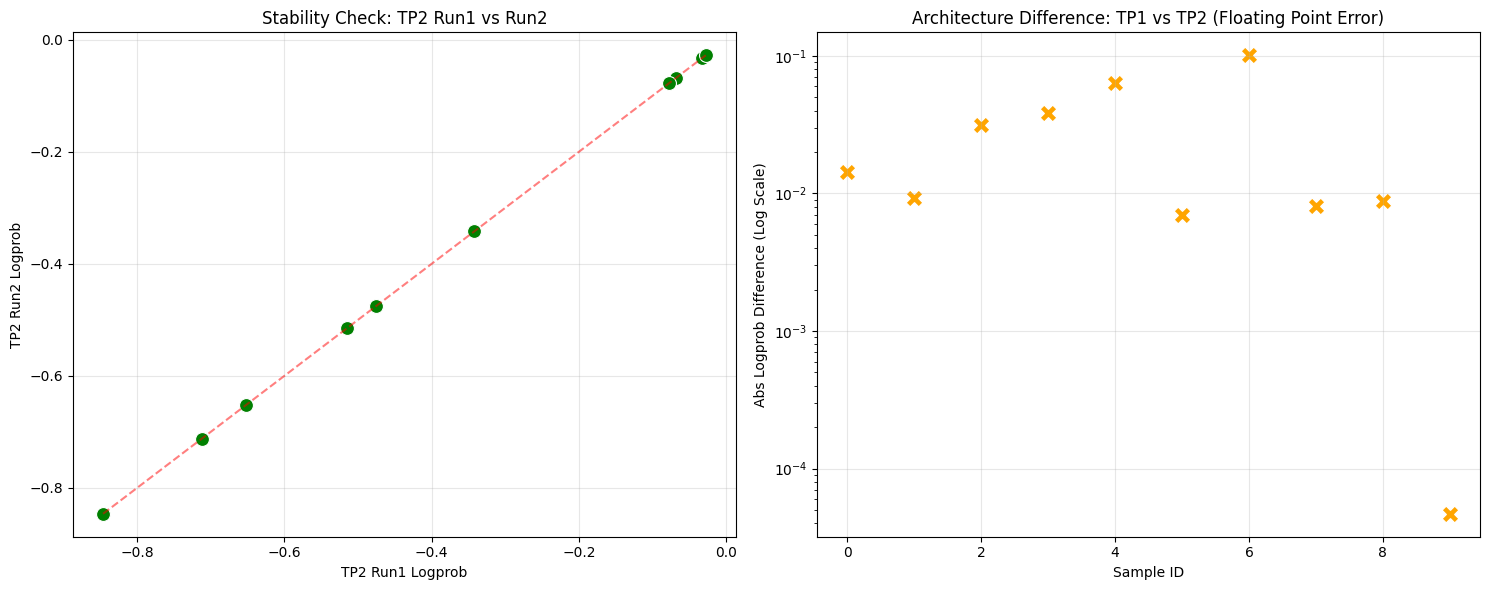


====== ⚠️ 发现文本不一致的样本 ======
ID 0 Prompt: 法国的首都是哪里？
TP1 Output:   法国的首都是巴黎（Paris）。巴黎不仅是法国的政治、经济、文化和交通中心，也是世界上最著名的城市...
TP2 Output:   法国的首都是巴黎（Paris）。巴黎不仅是法国的政治、经济、文化和交通中心，也是世界上最著名的城市...
------------------------------
ID 4 Prompt: 请模仿李白的风格写两句关于月亮的诗。
TP1 Output:   举杯邀明月，对影成三人。  
清辉洒江海，孤光照古今。  

（注：此诗仿李白《月下独酌》意境，以...
TP2 Output:   举杯邀明月，对影成三人。  
清辉洒江海，孤光照古今。  

（注：此诗仿李白《月下独酌》之豪放飘...
------------------------------
ID 6 Prompt: Translate 'Artificial Intelligence is the future' into Chinese.
TP1 Output:   Artificial Intelligence is the future.

A. 人工智能是未...
TP2 Output:   Artificial Intelligence is the future.

A. 人工智能是未...
------------------------------
ID 9 Prompt: 为什么苹果会往地上掉而不是往天上飞？简要解释。
TP1 Output:   苹果会往地上掉而不是往天上飞，是因为地球的引力作用。地球对所有有质量的物体都有吸引力，这种力使物体...
TP2 Output:   苹果会往地上掉而不是往天上飞，是因为地球的引力作用。地球对所有有质量的物体都有吸引力，这种力使物体...
------------------------------


In [5]:

# === 1. 加载数据的函数 ===
def load_json_to_df(filename, label):
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            data = json.load(f)
        # 提取关键字段
        df = pd.DataFrame(data)
        df = df[['id', 'prompt', 'text', 'first_token_logprob']]
        df.columns = ['id', 'prompt', f'text_{label}', f'logprob_{label}']
        return df
    except FileNotFoundError:
        print(f"找不到文件: {filename}，请确保路径正确。")
        return None

# === 2. 读取三个文件 ===
# 请根据你实际保存的文件名修改这里
df_tp1 = load_json_to_df('result_tp1.json', 'tp1')
df_tp2_1 = load_json_to_df('result_tp2_run1.json', 'tp2_run1')
df_tp2_2 = load_json_to_df('result_tp2_run2.json', 'tp2_run2')

# 合并数据
if df_tp1 is not None and df_tp2_1 is not None and df_tp2_2 is not None:
    df = pd.merge(df_tp1, df_tp2_1, on=['id', 'prompt'])
    df = pd.merge(df, df_tp2_2, on=['id', 'prompt'])

    # === 3. 计算差异 ===
    # 稳定性差异 (Run1 vs Run2)
    df['diff_stability'] = (df['logprob_tp2_run1'] - df['logprob_tp2_run2']).abs()
    # 架构差异 (TP1 vs TP2)
    df['diff_architecture'] = (df['logprob_tp1'] - df['logprob_tp2_run1']).abs()

    # 文本一致性检查
    df['text_stable'] = df['text_tp2_run1'] == df['text_tp2_run2']
    df['text_match'] = df['text_tp1'] == df['text_tp2_run1']

    # === 4. 输出统计表格 ===
    print("====== 📊 统计摘要 ======")
    print(f"测试样本数: {len(df)}")
    print(f"TP2 内部稳定性 (Run1 vs Run2) 最大误差: {df['diff_stability'].max():.10f}")
    print(f"TP1 vs TP2 架构最大误差: {df['diff_architecture'].max():.10f}")
    print(f"文本完全匹配率 (TP1 vs TP2): {df['text_match'].mean() * 100:.1f}%")

    # === 5. 可视化 ===
    plt.figure(figsize=(15, 6))

    # 图 1: 稳定性测试 (TP2 Run1 vs Run2)
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='logprob_tp2_run1', y='logprob_tp2_run2', data=df, color='green', s=100)
    plt.plot([df['logprob_tp2_run1'].min(), df['logprob_tp2_run1'].max()],
             [df['logprob_tp2_run1'].min(), df['logprob_tp2_run1'].max()],
             'r--', alpha=0.5, label='Perfect Match')
    plt.title('Stability Check: TP2 Run1 vs Run2')
    plt.xlabel('TP2 Run1 Logprob')
    plt.ylabel('TP2 Run2 Logprob')
    plt.grid(True, alpha=0.3)

    # 图 2: 架构误差散点图 (TP1 vs TP2 误差幅度)
    plt.subplot(1, 2, 2)
    # 这里我们画每一个样本的误差大小
    sns.scatterplot(x='id', y='diff_architecture', data=df, color='orange', s=150, marker='X')
    plt.title('Architecture Difference: TP1 vs TP2 (Floating Point Error)')
    plt.xlabel('Sample ID')
    plt.ylabel('Abs Logprob Difference')
    plt.axhline(0, color='black', linewidth=1)
    plt.grid(True, alpha=0.3)

    # 使用对数坐标轴，因为误差可能非常小
    if df['diff_architecture'].max() > 0:
        plt.yscale('log')
        plt.ylabel('Abs Logprob Difference (Log Scale)')

    plt.tight_layout()
    plt.show()

    # === 6. 如果有文本不一样，打印出来看看 ===
    mismatches = df[~df['text_match']]
    if not mismatches.empty:
        print("\n====== ⚠️ 发现文本不一致的样本 ======")
        for index, row in mismatches.iterrows():
            print(f"ID {row['id']} Prompt: {row['prompt']}")
            print(f"TP1 Output:  {row['text_tp1'][:50]}...")
            print(f"TP2 Output:  {row['text_tp2_run1'][:50]}...")
            print("-" * 30)
    else:
        print("\n====== ✅ 恭喜！TP1 和 TP2 生成的文本完全一致 ======")

else:
    print("数据加载失败，请检查文件名。")

# Analysis 2  TP2多次运行结果一致 TP2和TP1结果不同


In [ ]:
def analyze_and_visualize_logits(df_merged, tp1_name='TP1', tp2_name='TP2'):
    """
    分析和可视化两个时间点(TP1, TP2)之间的logits差异

    Parameters:
    df_merged: 包含logits数据的DataFrame
    tp1_name: 第一个时间点的名称，默认为'TP1'
    tp2_name: 第二个时间点的名称，默认为'TP2'

    Returns:
    None (直接显示图表和打印报告)
    """
    import seaborn as sns
    import matplotlib.pyplot as plt

    # === 3. 计算核心指标 ===

    # A. 计算 Logits 绝对误差 (数值差异)
    # 我们对比 Top1_Logprob 的差异
    df_merged['Logits_Diff'] = (df_merged[f'Top1_Logprob_{tp1_name}'] - df_merged[f'Top1_Logprob_{tp2_name}']).abs()

    # B. 检查 Token ID 是否翻转 (排序差异)
    # 如果 ID 不一样，说明微小的误差导致模型选了不同的词
    df_merged['Token_Mismatch'] = df_merged[f'Top1_ID_{tp1_name}'] != df_merged[f'Top1_ID_{tp2_name}']

    # C. 为了画图方便，创建一个全局的 Step 计数 (Global Step)
    df_merged['Global_Step'] = df_merged.index

    # === 4. 可视化绘图 ===
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(16, 10))

    # --- 图 1: Logits 误差散点图 (The "Noise" Plot) ---
    plt.subplot(2, 1, 1)

    # 画散点，颜色根据 Question_ID 区分
    scatter = sns.scatterplot(
        data=df_merged,
        x='Global_Step',
        y='Logits_Diff',
        hue='Question_ID',
        palette='tab10',
        s=60,
        alpha=0.7,
        edgecolor='w'
    )

    # 关键：使用对数坐标轴，因为误差通常极小
    plt.yscale('log')

    plt.title(f' {tp1_name} vs {tp2_name} Logits Difference (Floating Point Error Analysis)', fontsize=15)
    plt.ylabel('Abs Difference (Log Scale)', fontsize=12)
    plt.xlabel('Token Sequence (Across all questions)', fontsize=12)
    plt.axhline(y=1e-5, color='r', linestyle='--', label='1e-5 Threshold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Question ID")
    plt.grid(True, which="both", ls="--", alpha=0.3)

    plt.tight_layout()
    plt.show()

    # === 5. 文字报告 ===
    print("====== 📝 实验结果分析报告 ======")
    print(f"总计分析 Token 数: {len(df_merged)}")
    print(f"最大 Logits 误差: {df_merged['Logits_Diff'].max():.2e}")
    print(f"平均 Logits 误差: {df_merged['Logits_Diff'].mean():.2e}")
    print("-" * 30)

    mismatches = df_merged[df_merged['Token_Mismatch']]
    if len(mismatches) > 0:
        print(f"⚠️ 警告: 发现 {len(mismatches)} 个 Token 发生了选择翻转 (Butterfly Effect)!")
        print("翻转详情 (前5个):")
        print(mismatches[['Question_ID', 'Step_Index', f'Top1_Text_{tp1_name}', f'Top1_Text_{tp2_name}', 'Logits_Diff']].head())
    else:
        print("✅ 完美一致: 尽管存在浮点误差，但 {} 和 {} 选择的 Token 序列完全一样 (0 翻转)。".format(tp1_name, tp2_name))
        print("结论: 这种微小的误差 (Atomic Add 导致) 未影响生成结果。")

def compare_logprob_and_prob(df_merged, tp1_name='TP1', tp2_name='TP2'):
    """
    比较两个时间点(TP1, TP2)之间的logprob和probability差异

    Parameters:
    df_merged: 包含logits数据的DataFrame
    tp1_name: 第一个时间点的名称，默认为'TP1'
    tp2_name: 第二个时间点的名称，默认为'TP2'

    Returns:
    None (直接显示图表和打印报告)
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # 确保 df_merged 还在内存里，如果不在请重新运行上一段的"读取"部分
    if df_merged is None:
        print("请先提供 df_merged 数据！")
        return

    # 1. 计算线性概率 (Probability = exp(Logprob))
    # 这代表模型认为这个词出现的真实概率 (0% - 100%)
    df_merged[f'Prob_{tp1_name}'] = np.exp(df_merged[f'Top1_Logprob_{tp1_name}'])
    df_merged[f'Prob_{tp2_name}'] = np.exp(df_merged[f'Top1_Logprob_{tp2_name}'])

    # 2. 绘图
    plt.figure(figsize=(16, 7))

    # --- 左图: Logprob Scatter (对数空间) ---
    plt.subplot(1, 2, 1)
    sns.scatterplot(
        x=f'Top1_Logprob_{tp1_name}',
        y=f'Top1_Logprob_{tp2_name}',
        data=df_merged,
        alpha=0.6,
        edgecolor=None,
        s=30,
        color='blue'
    )

    # 画一条 y=x 的红线作为基准
    min_val = min(df_merged[f'Top1_Logprob_{tp1_name}'].min(), df_merged[f'Top1_Logprob_{tp2_name}'].min())
    max_val = max(df_merged[f'Top1_Logprob_{tp1_name}'].max(), df_merged[f'Top1_Logprob_{tp2_name}'].max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1, label='Perfect Match (y=x)')

    plt.title(f'Log Space: {tp1_name} vs {tp2_name} (Logprobs)', fontsize=14)
    plt.xlabel(f'{tp1_name} Logprob (Values < 0)')
    plt.ylabel(f'{tp2_name} Logprob (Values < 0)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # --- 右图: Probability Scatter (线性空间) ---
    plt.subplot(1, 2, 2)
    sns.scatterplot(
        x=f'Prob_{tp1_name}',
        y=f'Prob_{tp2_name}',
        data=df_merged,
        alpha=0.6,
        edgecolor=None,
        s=30,
        color='green'
    )

    # 画一条 y=x 的红线
    plt.plot([0, 1], [0, 1], 'r--', linewidth=1, label='Perfect Match (y=x)')

    plt.title(f'Linear Space: {tp1_name} vs {tp2_name} (Probabilities)', fontsize=14)
    plt.xlabel(f'{tp1_name} Probability (0.0 - 1.0)')
    plt.ylabel(f'{tp2_name} Probability (0.0 - 1.0)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 简单的统计
    print(f"Logprob 相关系数: {df_merged[f'Top1_Logprob_{tp1_name}'].corr(df_merged[f'Top1_Logprob_{tp2_name}']):.8f}")
    print(f"Probability 相关系数: {df_merged[f'Prob_{tp1_name}'].corr(df_merged[f'Prob_{tp2_name}']):.8f}")
    print()

    # 设置一个极小值防止除零
    epsilon = 1e-9

    # === 1. 计算 MSE (均方误差) ===
    mse_logprob = ((df_merged[f'Top1_Logprob_{tp1_name}'] - df_merged[f'Top1_Logprob_{tp2_name}']) ** 2).mean()
    mse_prob    = ((df_merged[f'Prob_{tp1_name}'] - df_merged[f'Prob_{tp2_name}']) ** 2).mean()

    # === 2. 计算 Relative Error (相对误差) ===
    # 公式: |TP1 - TP2| / (|TP1| + epsilon)
    # Logprob 空间
    rel_err_log = (df_merged[f'Top1_Logprob_{tp1_name}'] - df_merged[f'Top1_Logprob_{tp2_name}']).abs() / (df_merged[f'Top1_Logprob_{tp1_name}'].abs() + epsilon)
    # Probability 空间
    rel_err_prob = (df_merged[f'Prob_{tp1_name}'] - df_merged[f'Prob_{tp2_name}']).abs

def calculate_error_metrics(df_merged, tp1_name='TP1', tp2_name='TP2'):
    """
    计算两个时间点(TP1, TP2)之间的误差指标

    Parameters:
    df_merged: 包含logits数据的DataFrame
    tp1_name: 第一个时间点的名称，默认为'TP1'
    tp2_name: 第二个时间点的名称，默认为'TP2'

    Returns:
    dict: 包含各种误差指标的字典
    """
    import numpy as np

    # 设置一个极小值防止除零
    epsilon = 1e-9

    # === 1. 计算 MSE (均方误差) ===
    mse_logprob = ((df_merged[f'Top1_Logprob_{tp1_name}'] - df_merged[f'Top1_Logprob_{tp2_name}']) ** 2).mean()
    mse_prob    = ((df_merged[f'Prob_{tp1_name}'] - df_merged[f'Prob_{tp2_name}']) ** 2).mean()

    # === 2. 计算 Relative Error (相对误差) ===
    # 公式: |TP1 - TP2| / (|TP1| + epsilon)
    # Logprob 空间
    rel_err_log = (df_merged[f'Top1_Logprob_{tp1_name}'] - df_merged[f'Top1_Logprob_{tp2_name}']).abs() / (df_merged[f'Top1_Logprob_{tp1_name}'].abs() + epsilon)
    # Probability 空间
    rel_err_prob = (df_merged[f'Prob_{tp1_name}'] - df_merged[f'Prob_{tp2_name}']).abs() / (df_merged[f'Prob_{tp1_name}'] + epsilon)

    # === 3. 格式化输出 ===
    print(f"====== 📉 误差统计分析 (Metrics) ======")
    print(f"MSE (Logprob空间):      {mse_logprob:.5e}")
    print(f"MSE (Probability空间):  {mse_prob:.5e}")
    print("-" * 40)
    # print(f"平均相对误差 (Logprob):     {rel_err_log.mean():.6%}  (Max: {rel_err_log.max():.4%})")
    print(f"平均相对误差 (Probability): {rel_err_prob.mean():.6%}  (Max: {rel_err_prob.max():.4%})")

    # 如果你想看相对误差最大的前3个样本
    print(f"\n====== ⚠️ 相对误差(Prob)最大的 Top 3 样本 ======")
    df_merged['Rel_Err_Prob_Val'] = rel_err_prob
    top_errors = df_merged.nlargest(3, 'Rel_Err_Prob_Val')
    for i, row in top_errors.iterrows():
        print(f"ID: {row['Question_ID']} | Token: {row[f'Top1_Text_{tp1_name}']} | {tp1_name}_Prob: {row[f'Prob_{tp1_name}']:.4f} | {tp2_name}_Prob: {row[f'Prob_{tp2_name}']:.4f} | Err: {row['Rel_Err_Prob_Val']:.2%}")

    # 返回误差指标字典
    return {
        'mse_logprob': mse_logprob,
        'mse_prob': mse_prob,
        'mean_rel_err_log': rel_err_log.mean(),
        'max_rel_err_log': rel_err_log.max(),
        'mean_rel_err_prob': rel_err_prob.mean(),
        'max_rel_err_prob': rel_err_prob.max(),
        'rel_err_log': rel_err_log,
        'rel_err_prob': rel_err_prob
    }

def analyze_divergence_tracking(df_merged, tp1_name='TP1', tp2_name='TP2'):
    """
    分析两个时间点(TP1, TP2)之间的路径偏离情况

    Parameters:
    df_merged: 包含logits数据的DataFrame
    tp1_name: 第一个时间点的名称，默认为'TP1'
    tp2_name: 第二个时间点的名称，默认为'TP2'

    Returns:
    dict: 包含分析结果的字典
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import pandas as pd

    # ==========================================
    # 1. 核心逻辑：识别并标记"分水岭" (Divergence Tracking)
    # ==========================================

    # A. 计算单点 Token 是否不匹配
    df_merged['Token_Mismatch'] = df_merged[f'Top1_ID_{tp1_name}'] != df_merged[f'Top1_ID_{tp2_name}']

    # B. 计算分水岭状态 (Is_Diverged)
    # 逻辑：对于每个问题，一旦出现过 Mismatch，后续所有 Token 都标记为 Diverged
    df_merged['Is_Diverged'] = False

    for q_id in df_merged['Question_ID'].unique():
        # 获取当前问题的掩码
        q_mask = df_merged['Question_ID'] == q_id
        q_data = df_merged[q_mask].sort_values('Step_Index')

        # 找到第一个不匹配的索引
        mismatch_steps = q_data[q_data['Token_Mismatch']]['Step_Index']

        if not mismatch_steps.empty:
            first_mismatch_step = mismatch_steps.min()
            # 将该 step 及其之后的 token 全部标记为已偏离
            df_merged.loc[q_mask & (df_merged['Step_Index'] >= first_mismatch_step), 'Is_Diverged'] = True

    # 创建可读的状态标签用于绘图
    df_merged['Diverge_Status'] = df_merged['Is_Diverged'].map({False: 'Consistent (Pre-diverge)', True: 'Diverged (Post-diverge)'})

    # ==========================================
    # 2. 重新计算核心指标 (Metrics)
    # ==========================================

    # 计算概率空间值
    df_merged[f'Prob_{tp1_name}'] = np.exp(df_merged[f'Top1_Logprob_{tp1_name}'])
    df_merged[f'Prob_{tp2_name}'] = np.exp(df_merged[f'Top1_Logprob_{tp2_name}'])
    df_merged['Logits_Diff'] = (df_merged[f'Top1_Logprob_{tp1_name}'] - df_merged[f'Top1_Logprob_{tp2_name}']).abs()

    # 分组计算指标：我们主要关注"一致阶段"的微小误差
    stats_consistent = df_merged[~df_merged['Is_Diverged']]
    stats_diverged = df_merged[df_merged['Is_Diverged']]

    # ==========================================
    # 3. 可视化绘图 (Improved Scatter Plot)
    # ==========================================

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(18, 8))

    # --- 右图 (按您的要求修改的 Prob 散点图) ---
    plt.subplot(1, 2, 1)

    # 使用不同颜色区分一致前和差别后
    # 绿色代表路径一致时的微小浮点误差，红色代表路径分叉后的巨大差异
    palette_colors = {"Consistent (Pre-diverge)": "#2ecc71", "Diverged (Post-diverge)": "#e74c3c"}

    sns.scatterplot(
        x=f'Prob_{tp1_name}',
        y=f'Prob_{tp2_name}',
        hue='Diverge_Status',
        data=df_merged,
        palette=palette_colors,
        alpha=0.6,
        edgecolor=None,
        s=40
    )

    # 画一条 y=x 的对角线
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, linewidth=1, label='Perfect Match (y=x)')

    plt.title(f'Probability Distribution: {tp1_name} vs {tp2_name} (Pre vs Post Divergence)', fontsize=15)
    plt.xlabel(f'{tp1_name} Probability', fontsize=12)
    plt.ylabel(f'{tp2_name} Probability', fontsize=12)
    plt.legend(title="Generation Status")

    # --- 左图: Logits 随时间的变化 (显示误差积累) ---
    plt.subplot(1, 2, 2)
    sns.scatterplot(
        x=df_merged.index,
        y='Logits_Diff',
        hue='Diverge_Status',
        data=df_merged,
        palette=palette_colors,
        s=40,
        alpha=0.7
    )
    plt.yscale('log') # 对数坐标更易观察 1e-6 级别的误差
    plt.axhline(y=1e-5, color='blue', linestyle=':', label='Common Float16 Noise Threshold')
    plt.title('Logits Absolute Difference (Temporal View)', fontsize=15)
    plt.ylabel('Abs Diff (Log Scale)', fontsize=12)
    plt.xlabel('Global Token Sequence', fontsize=12)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # ==========================================
    # 4. 详细指标报告
    # ==========================================
    print(f"      ====== 📊 {tp1_name} vs {tp2_name} 深度差异报告 ======      ")
    print(f"总分析 Token 数: {len(df_merged)}")
    print(f"发生路径偏离的 Token 数: {len(stats_diverged)} (占 {len(stats_diverged)/len(df_merged):.2%})")
    print("-" * 50)

    print(f"【阶段 A: 路径一致时 (Consistent)】")
    if not stats_consistent.empty:
        print(f" -> 平均 Logits 误差: {stats_consistent['Logits_Diff'].mean():.2e}")
        print(f" -> 最大 Logits 误差: {stats_consistent['Logits_Diff'].max():.2e}")
        print(f" -> MSE (Probability): {((stats_consistent[f'Prob_{tp1_name}'] - stats_consistent[f'Prob_{tp2_name}'])**2).mean():.2e}")
    else:
        print(" -> (无数据)")

    print(f"\n【阶段 B: 路径偏离后 (Diverged)】")
    if not stats_diverged.empty:
        print(f" -> 平均 Logits 误差: {stats_diverged['Logits_Diff'].mean():.2e} (由于输入不同，误差天然变大)")
        print(f" -> 路径偏离的首个 ID 示例:")
        first_diffs = df_merged[df_merged['Token_Mismatch']].groupby('Question_ID').first()
        print(first_diffs[[f'Top1_Text_{tp1_name}', f'Top1_Text_{tp2_name}', 'Logits_Diff']].head())
    else:
        print(f" -> ✅ 恭喜：所有样本路径完全一致，未发生 Divergence。")

    print("-" * 50)

    # 返回分析结果字典
    return {
        'stats_consistent': stats_consistent,
        'stats_diverged': stats_diverged,
        'total_tokens': len(df_merged),
        'diverged_tokens': len(stats_diverged),
        'divergence_ratio': len(stats_diverged)/len(df_merged) if len(df_merged) > 0 else 0,
        'mean_logits_diff_consistent': stats_consistent['Logits_Diff'].mean() if not stats_consistent.empty else 0,
        'max_logits_diff_consistent': stats_consistent['Logits_Diff'].max() if not stats_consistent.empty else 0,
        'mse_prob_consistent': ((stats_consistent[f'Prob_{tp1_name}'] - stats_consistent[f'Prob_{tp2_name}'])**2).mean() if not stats_consistent.empty else 0
    }

In [11]:


# === 1. 加载数据 ===
# 请确保文件名和你刚才生成的一致
file_tp1 = 'result_detailed_tp1_run1.xlsx'
# file_tp1 = 'result_detailed_tp2_2.xlsx'
file_tp2 = 'result_detailed_tp2_run1.xlsx'

print(f"正在读取 {file_tp1} ...")
df_tp1 = pd.read_excel(file_tp1)
print(f"正在读取 {file_tp2} ...")
df_tp2 = pd.read_excel(file_tp2)

# 给列名加后缀，防止重名
# 我们主要对比 Top1 的数值，以及 Top1 的 Token ID 是否一致
suffix_tp1 = '_TP1'
suffix_tp2 = '_TP2'

# === 2. 数据对齐与合并 ===
# 我们按 Question_ID 和 Step_Index (第几个词) 进行对齐
merge_keys = ['Question_ID', 'Step_Index']
df_merged = pd.merge(
    df_tp1,
    df_tp2,
    on=merge_keys,
    suffixes=(suffix_tp1, suffix_tp2),
    how='inner'
)


正在读取 result_detailed_tp1_run1.xlsx ...
正在读取 result_detailed_tp2_run1.xlsx ...


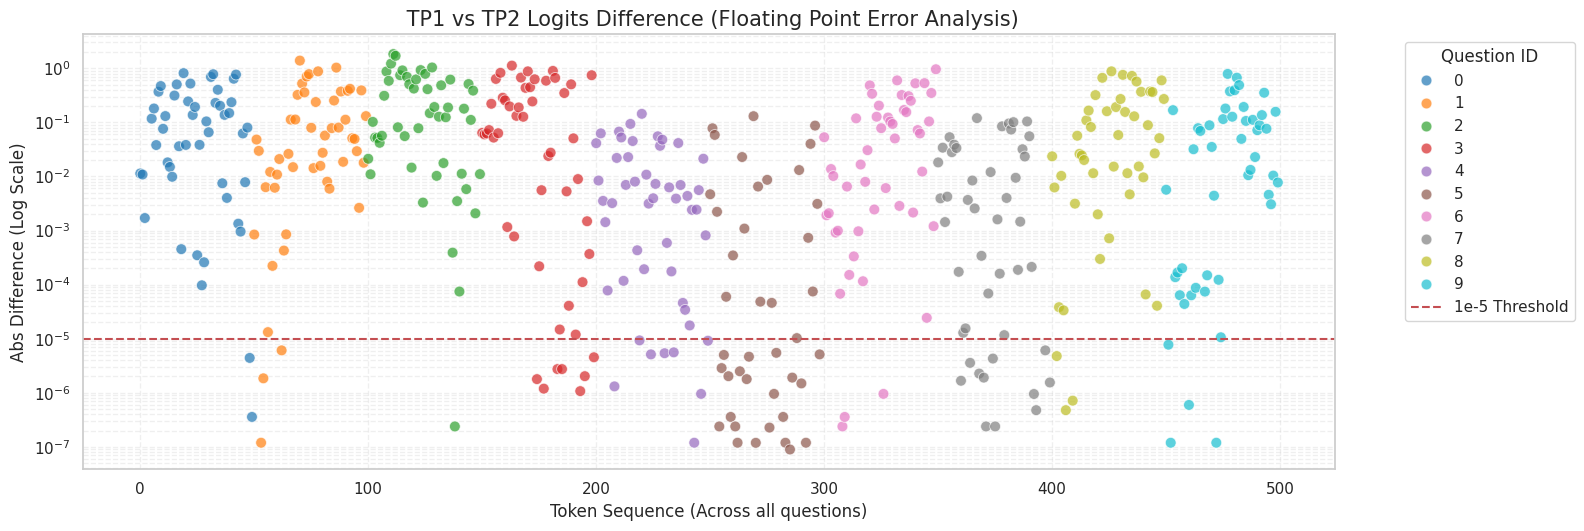

====== 📝 实验结果分析报告 ======
总计分析 Token 数: 500
最大 Logits 误差: 1.83e+00
平均 Logits 误差: 1.36e-01
------------------------------
⚠️ 警告: 发现 260 个 Token 发生了选择翻转 (Butterfly Effect)!
翻转详情 (前5个):
   Question_ID  Step_Index Top1_Text_TP1 Top1_Text_TP2  Logits_Diff
5            0           5            **            巴黎     0.117218
6            0           6            巴黎             （     0.180510
7            0           7            **         Paris     0.038083
8            0           8             （            ）。     0.369327
9            0           9         Paris            作为     0.469457


In [18]:
analyze_and_visualize_logits(df_merged, 'TP1', 'TP2')

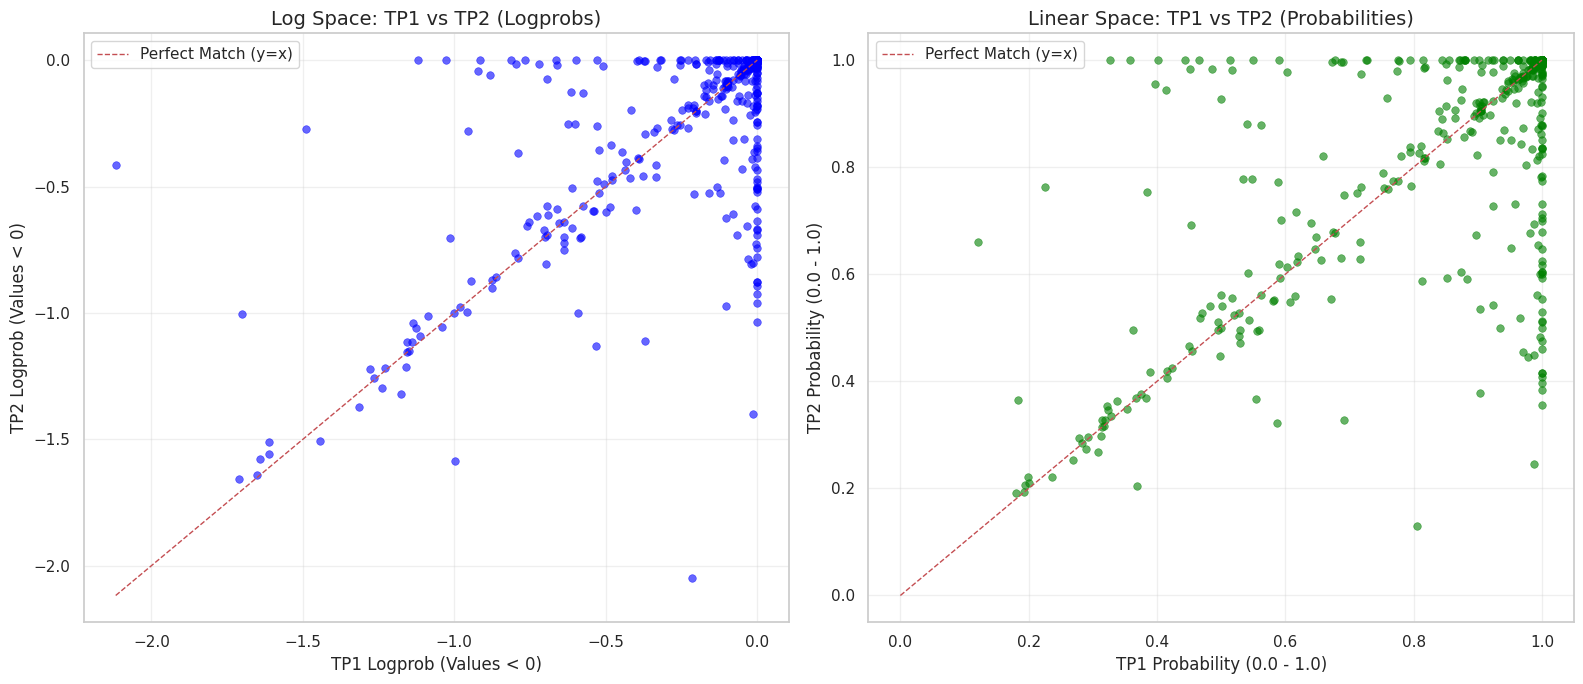

Logprob 相关系数: 0.68412835
Probability 相关系数: 0.65416271



In [20]:
compare_logprob_and_prob(df_merged, tp1_name='TP1', tp2_name='TP2')

In [24]:
x = calculate_error_metrics(df_merged, tp1_name='TP1', tp2_name='TP2')

====== 📉 误差统计分析 (Metrics) ======
MSE (Logprob空间):      8.40363e-02
MSE (Probability空间):  3.41545e-02
----------------------------------------
平均相对误差 (Probability): 14.171809%  (Max: 448.5799%)

====== ⚠️ 相对误差(Prob)最大的 Top 3 样本 ======
ID: 2 | Token: 给出 | TP1_Prob: 0.1203 | TP2_Prob: 0.6599 | Err: 448.58%
ID: 2 | Token: 最后 | TP1_Prob: 0.2253 | TP2_Prob: 0.7625 | Err: 238.51%
ID: 3 | Token: 以下 | TP1_Prob: 0.3262 | TP2_Prob: 1.0000 | Err: 206.53%


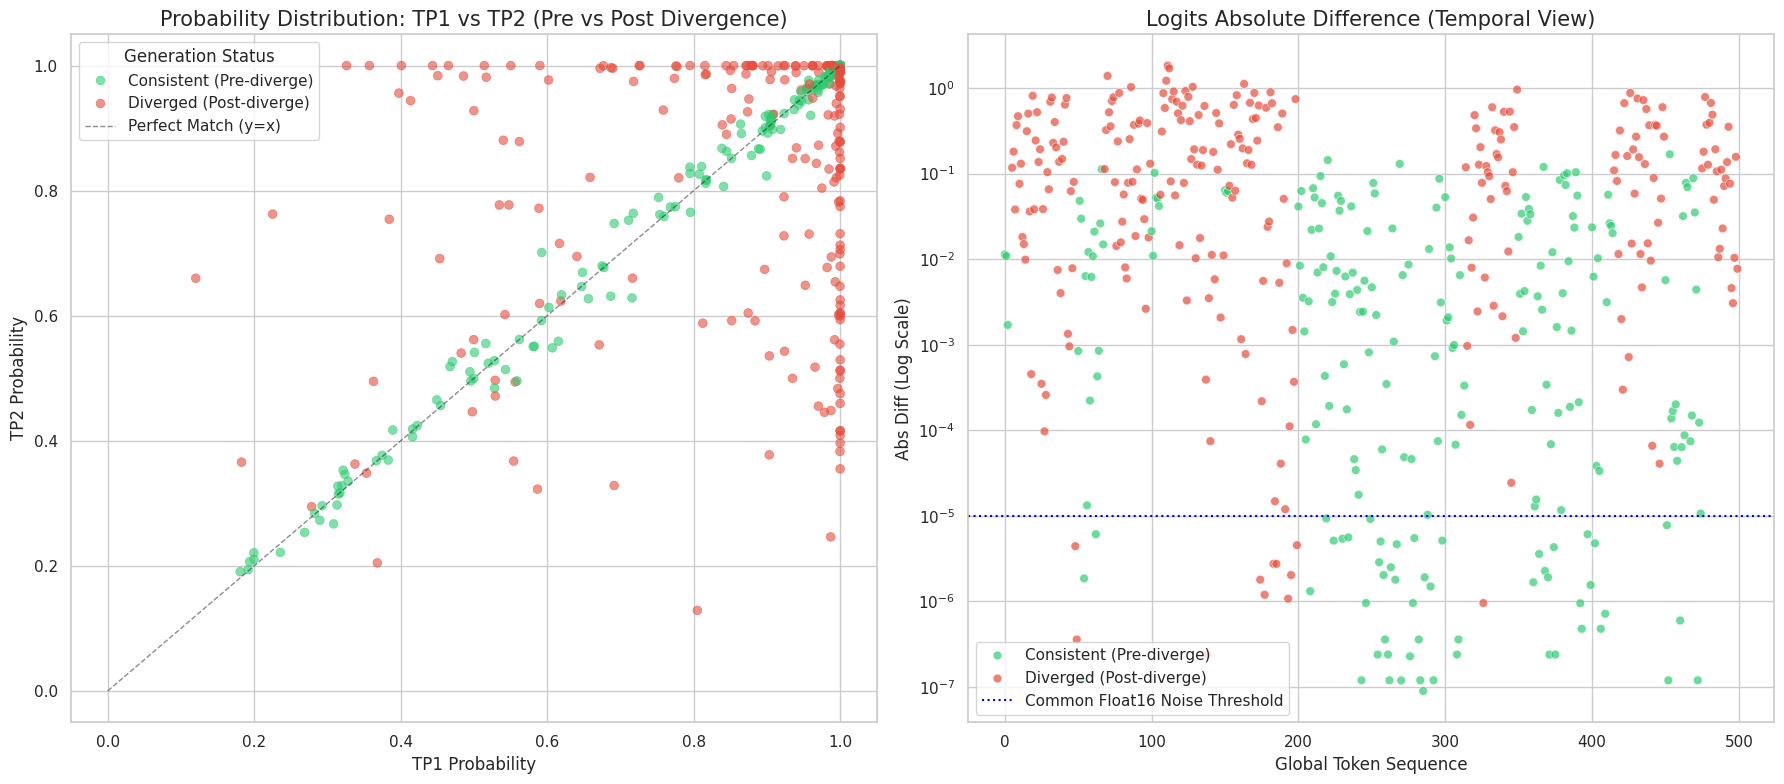

      ====== 📊 TP1 vs TP2 深度差异报告 ======      
总分析 Token 数: 500
发生路径偏离的 Token 数: 264 (占 52.80%)
--------------------------------------------------
【阶段 A: 路径一致时 (Consistent)】
 -> 平均 Logits 误差: 1.60e-02
 -> 最大 Logits 误差: 1.68e-01
 -> MSE (Probability): 3.64e-04

【阶段 B: 路径偏离后 (Diverged)】
 -> 平均 Logits 误差: 2.44e-01 (由于输入不同，误差天然变大)
 -> 路径偏离的首个 ID 示例:
            Top1_Text_TP1 Top1_Text_TP2  Logits_Diff
Question_ID                                         
0                      **            巴黎     0.117218
1                      涉及            复杂     0.112856
2                      保持            平衡     0.056598
3                     ###            当然     0.072071
6                      是指             是     0.118636
--------------------------------------------------


In [27]:
x = analyze_divergence_tracking(df_merged, tp1_name='TP1', tp2_name='TP2')

## TP2 v.s. TP4

In [28]:


# === 1. 加载数据 ===
# 请确保文件名和你刚才生成的一致
file_tp1 = 'result_detailed_tp2_run1.xlsx'
# file_tp1 = 'result_detailed_tp2_2.xlsx'
file_tp2 = 'result_detailed_tp4_run1.xlsx'

print(f"正在读取 {file_tp1} ...")
df_tp1 = pd.read_excel(file_tp1)
print(f"正在读取 {file_tp2} ...")
df_tp2 = pd.read_excel(file_tp2)

# 给列名加后缀，防止重名
# 我们主要对比 Top1 的数值，以及 Top1 的 Token ID 是否一致
suffix_tp1 = '_TP2'
suffix_tp2 = '_TP4'

# === 2. 数据对齐与合并 ===
# 我们按 Question_ID 和 Step_Index (第几个词) 进行对齐
merge_keys = ['Question_ID', 'Step_Index']
df_merged = pd.merge(
    df_tp1,
    df_tp2,
    on=merge_keys,
    suffixes=(suffix_tp1, suffix_tp2),
    how='inner'
)


正在读取 result_detailed_tp2_run1.xlsx ...
正在读取 result_detailed_tp4_run1.xlsx ...


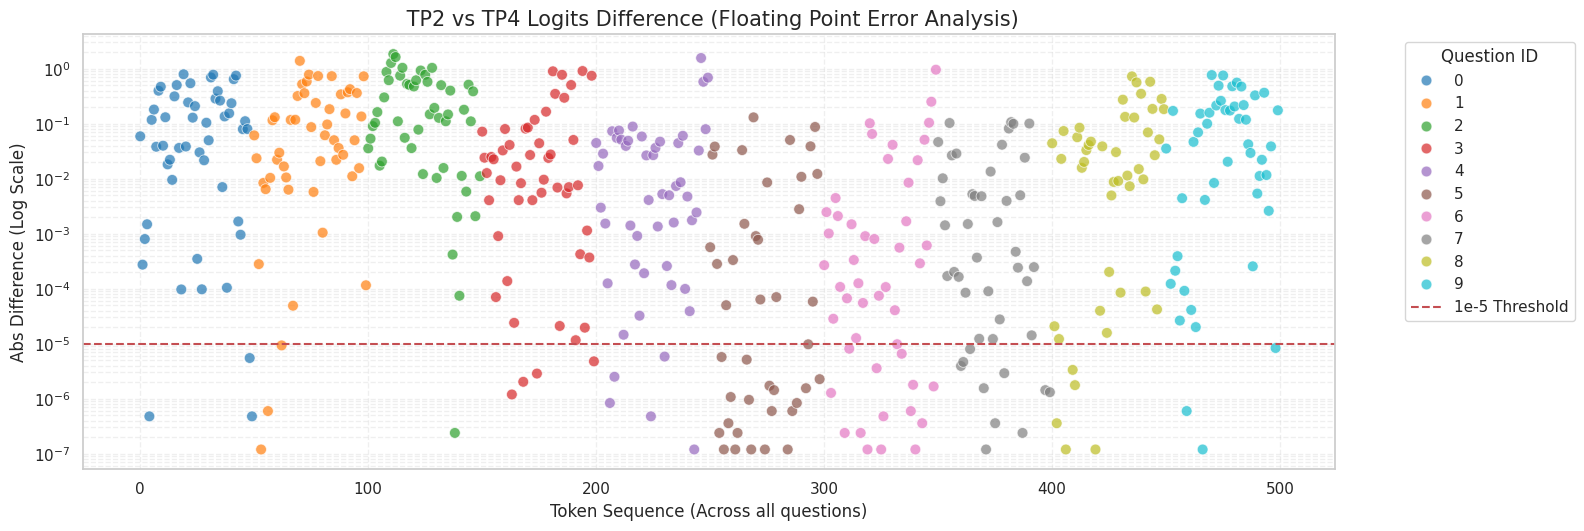

====== 📝 实验结果分析报告 ======
总计分析 Token 数: 500
最大 Logits 误差: 1.84e+00
平均 Logits 误差: 1.18e-01
------------------------------
⚠️ 警告: 发现 211 个 Token 发生了选择翻转 (Butterfly Effect)!
翻转详情 (前5个):
   Question_ID  Step_Index Top1_Text_TP2 Top1_Text_TP4  Logits_Diff
5            0           5            巴黎            **     0.117284
6            0           6             （            巴黎     0.180510
7            0           7         Paris            **     0.038095
8            0           8            ）。             （     0.397615
9            0           9            作为         Paris     0.469457


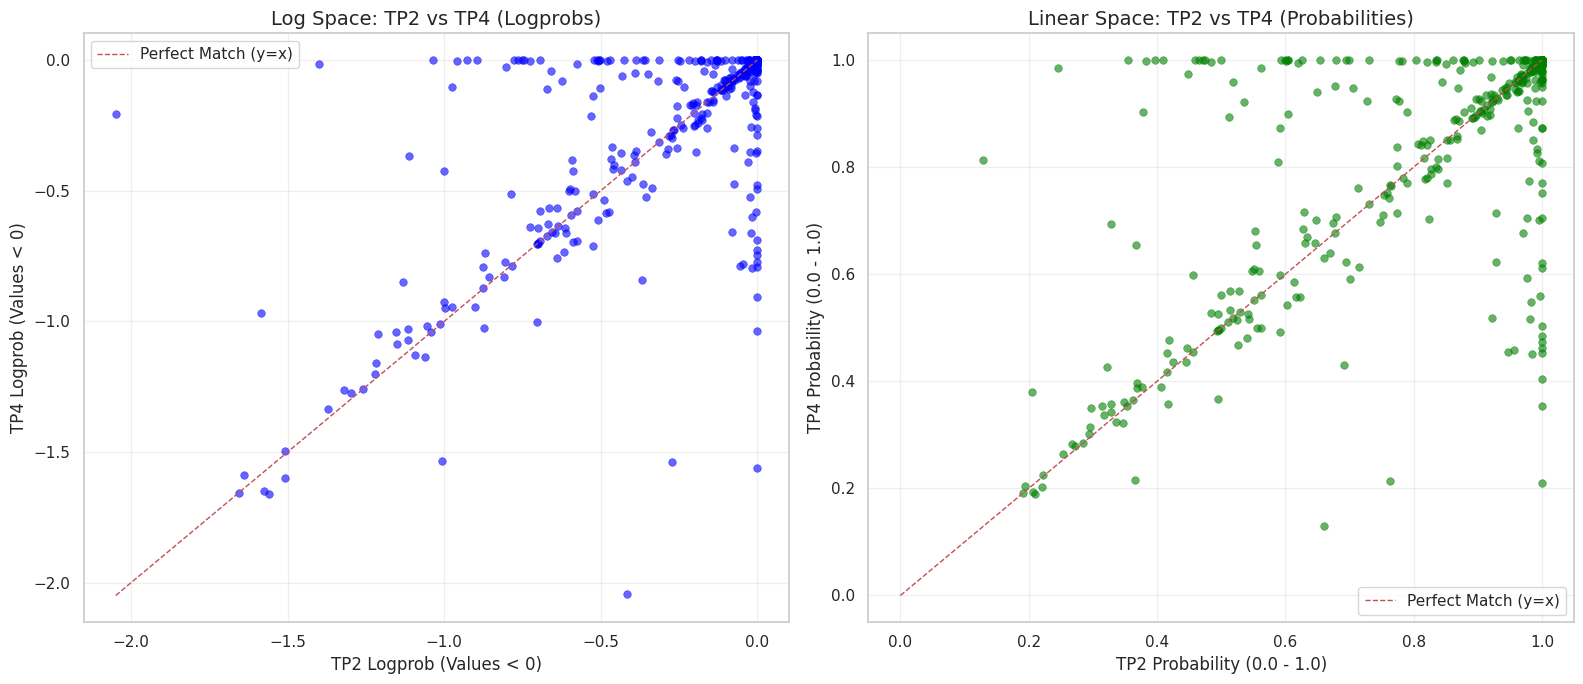

Logprob 相关系数: 0.71473672
Probability 相关系数: 0.70349175

====== 📉 误差统计分析 (Metrics) ======
MSE (Logprob空间):      7.55477e-02
MSE (Probability空间):  2.93509e-02
----------------------------------------
平均相对误差 (Probability): 13.465459%  (Max: 531.0045%)

====== ⚠️ 相对误差(Prob)最大的 Top 3 样本 ======
ID: 2 | Token: 给出 | TP2_Prob: 0.1289 | TP4_Prob: 0.8131 | Err: 531.00%
ID: 1 | Token: 深刻 | TP2_Prob: 0.2464 | TP4_Prob: 0.9859 | Err: 300.15%
ID: 2 | Token: ：

 | TP2_Prob: 0.3552 | TP4_Prob: 1.0000 | Err: 181.54%


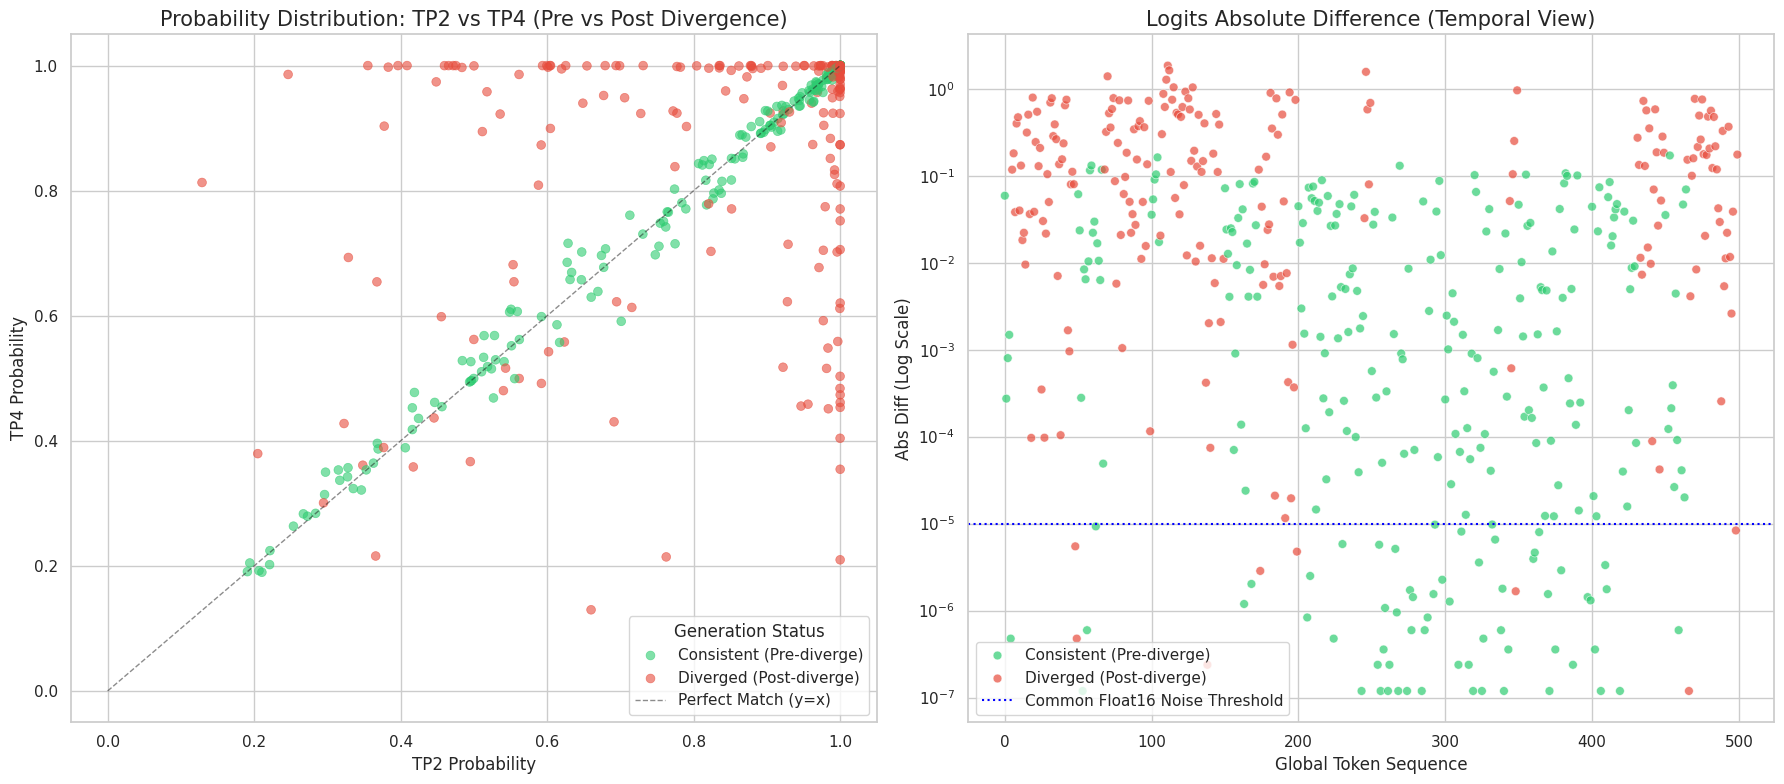

      ====== 📊 TP2 vs TP4 深度差异报告 ======      
总分析 Token 数: 500
发生路径偏离的 Token 数: 213 (占 42.60%)
--------------------------------------------------
【阶段 A: 路径一致时 (Consistent)】
 -> 平均 Logits 误差: 1.67e-02
 -> 最大 Logits 误差: 1.71e-01
 -> MSE (Probability): 3.75e-04

【阶段 B: 路径偏离后 (Diverged)】
 -> 平均 Logits 误差: 2.55e-01 (由于输入不同，误差天然变大)
 -> 路径偏离的首个 ID 示例:
            Top1_Text_TP2 Top1_Text_TP4  Logits_Diff
Question_ID                                         
0                      巴黎            **     0.117284
1                      复杂            涉及     0.117767
2                      平衡            保持     0.020472
3                      **        Python     0.117259
4                      情景            意境     0.032451
--------------------------------------------------


In [30]:
analyze_and_visualize_logits(df_merged, 'TP2', 'TP4')
compare_logprob_and_prob(df_merged, tp1_name='TP2', tp2_name='TP4')
x = calculate_error_metrics(df_merged, tp1_name='TP2', tp2_name='TP4')
x = analyze_divergence_tracking(df_merged, tp1_name='TP2', tp2_name='TP4')

## TP1 v.s. TP4

正在读取 result_detailed_tp1_run1.xlsx ...
正在读取 result_detailed_tp4_run1.xlsx ...


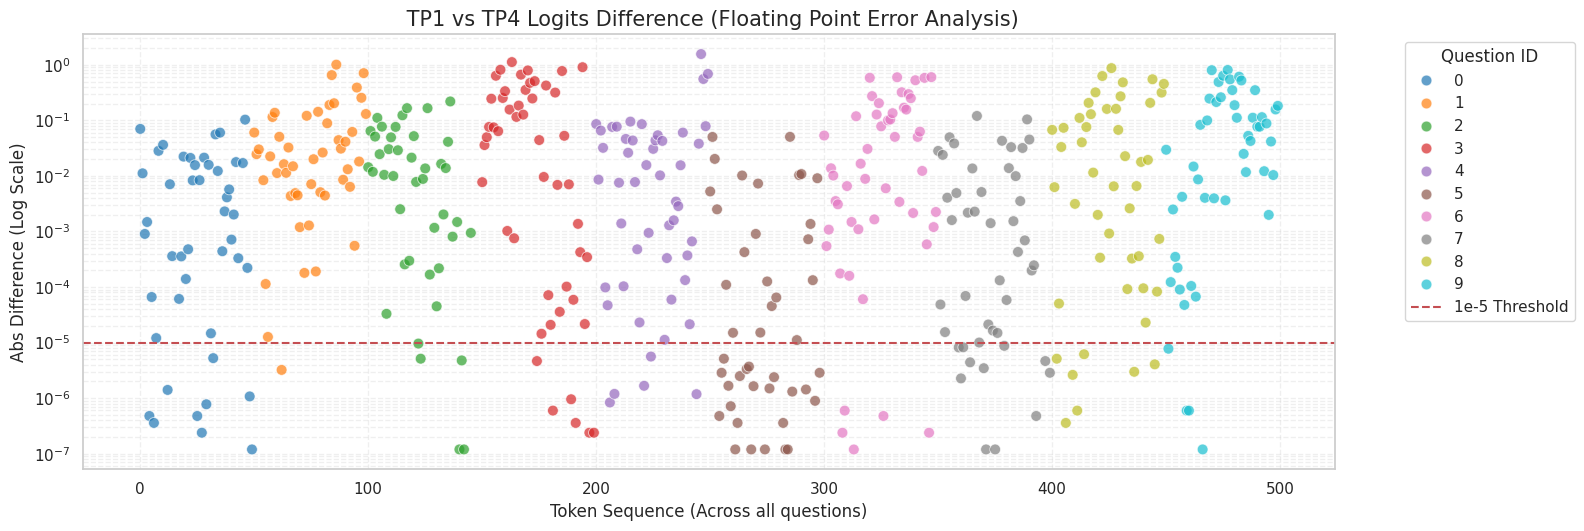

====== 📝 实验结果分析报告 ======
总计分析 Token 数: 500
最大 Logits 误差: 1.56e+00
平均 Logits 误差: 7.90e-02
------------------------------
⚠️ 警告: 发现 164 个 Token 发生了选择翻转 (Butterfly Effect)!
翻转详情 (前5个):
    Question_ID  Step_Index Top1_Text_TP1 Top1_Text_TP4  Logits_Diff
78            1          28            方面           方面的     0.142727
79            1          29            因素            复杂     0.005088
80            1          30             的            议题     0.026376
81            1          31            复杂             。     0.004437
82            1          32            议题            以下     0.088696


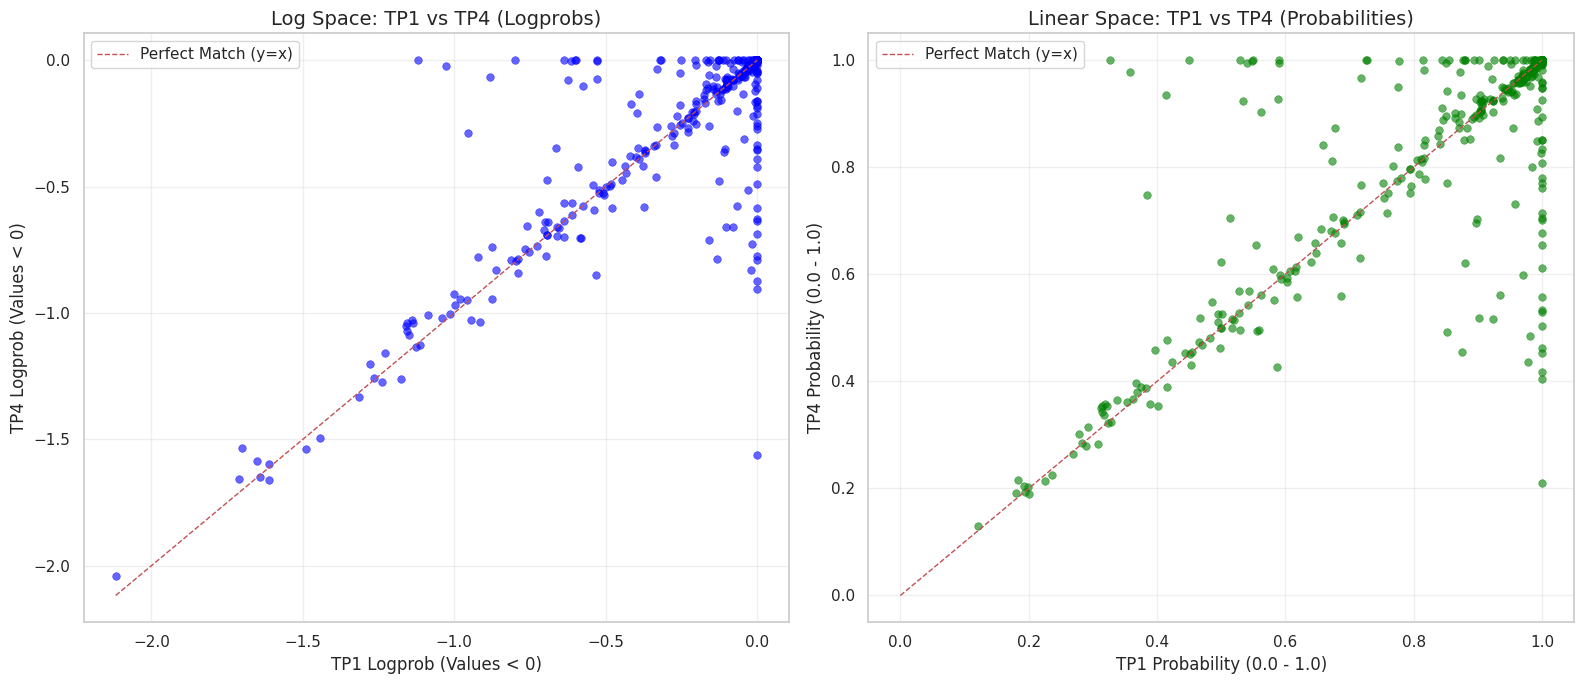

Logprob 相关系数: 0.84742522
Probability 相关系数: 0.80494837

====== 📉 误差统计分析 (Metrics) ======
MSE (Logprob空间):      4.00121e-02
MSE (Probability空间):  1.88204e-02
----------------------------------------
平均相对误差 (Probability): 8.005370%  (Max: 206.5260%)

====== ⚠️ 相对误差(Prob)最大的 Top 3 样本 ======
ID: 3 | Token: 以下 | TP1_Prob: 0.3262 | TP4_Prob: 1.0000 | Err: 206.53%
ID: 1 | Token: 多个 | TP1_Prob: 0.3574 | TP4_Prob: 0.9782 | Err: 173.74%
ID: 3 | Token: 中的 | TP1_Prob: 0.4135 | TP4_Prob: 0.9352 | Err: 126.13%


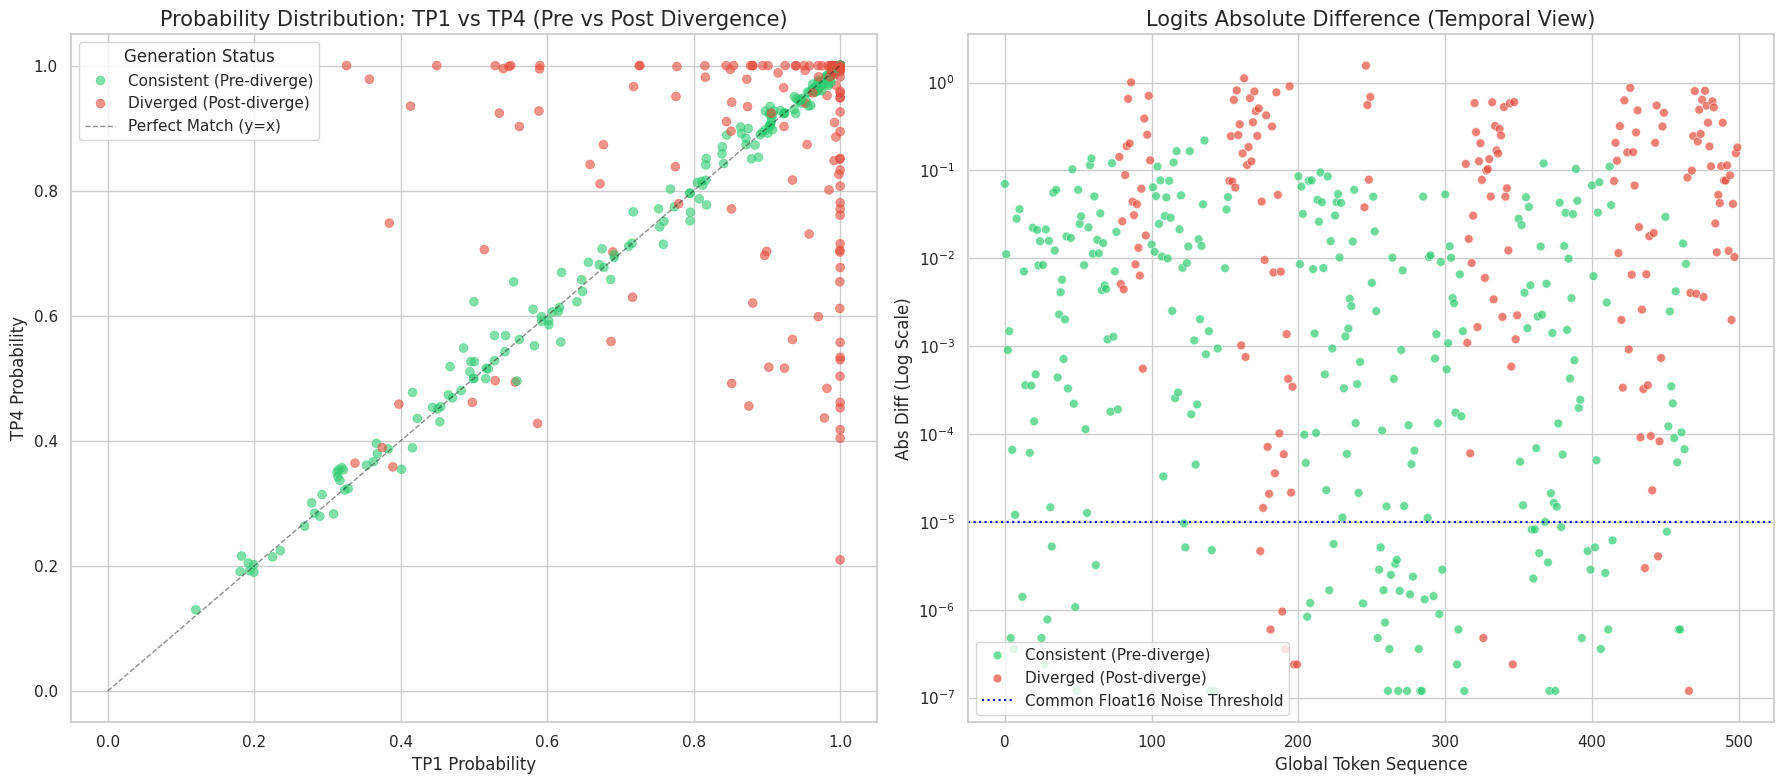

      ====== 📊 TP1 vs TP4 深度差异报告 ======      
总分析 Token 数: 500
发生路径偏离的 Token 数: 180 (占 36.00%)
--------------------------------------------------
【阶段 A: 路径一致时 (Consistent)】
 -> 平均 Logits 误差: 1.55e-02
 -> 最大 Logits 误差: 2.19e-01
 -> MSE (Probability): 3.07e-04

【阶段 B: 路径偏离后 (Diverged)】
 -> 平均 Logits 误差: 1.92e-01 (由于输入不同，误差天然变大)
 -> 路径偏离的首个 ID 示例:
            Top1_Text_TP1 Top1_Text_TP4  Logits_Diff
Question_ID                                         
1                      方面           方面的     0.142727
3                     ###            当然     0.076124
4                      情景            意境     0.038049
6                      是指             是     0.118648
8                      欧洲            战争     0.075885
--------------------------------------------------


In [31]:


# === 1. 加载数据 ===
# 请确保文件名和你刚才生成的一致
file_tp1 = 'result_detailed_tp1_run1.xlsx'
# file_tp1 = 'result_detailed_tp2_2.xlsx'
file_tp2 = 'result_detailed_tp4_run1.xlsx'

print(f"正在读取 {file_tp1} ...")
df_tp1 = pd.read_excel(file_tp1)
print(f"正在读取 {file_tp2} ...")
df_tp2 = pd.read_excel(file_tp2)

# 给列名加后缀，防止重名
# 我们主要对比 Top1 的数值，以及 Top1 的 Token ID 是否一致
suffix_tp1 = '_TP1'
suffix_tp2 = '_TP4'

# === 2. 数据对齐与合并 ===
# 我们按 Question_ID 和 Step_Index (第几个词) 进行对齐
merge_keys = ['Question_ID', 'Step_Index']
df_merged = pd.merge(
    df_tp1,
    df_tp2,
    on=merge_keys,
    suffixes=(suffix_tp1, suffix_tp2),
    how='inner'
)

analyze_and_visualize_logits(df_merged, 'TP1', 'TP4')
compare_logprob_and_prob(df_merged, tp1_name='TP1', tp2_name='TP4')
x = calculate_error_metrics(df_merged, tp1_name='TP1', tp2_name='TP4')
x = analyze_divergence_tracking(df_merged, tp1_name='TP1', tp2_name='TP4')

## TP4 v.s. TP4

正在读取 result_detailed_tp4_run2.xlsx ...
正在读取 result_detailed_tp4_run1.xlsx ...


/tmp/ipykernel_71583/4221724963.py:49: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')
/tmp/ipykernel_71583/4221724963.py:58: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.tight_layout()


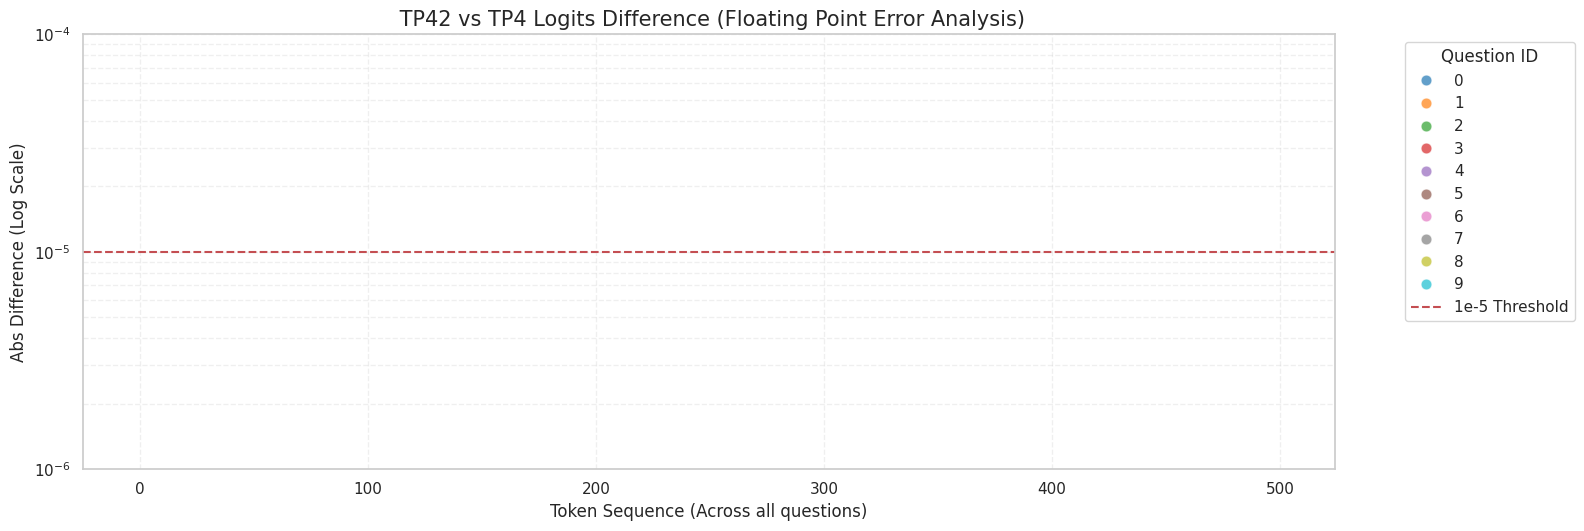

====== 📝 实验结果分析报告 ======
总计分析 Token 数: 500
最大 Logits 误差: 0.00e+00
平均 Logits 误差: 0.00e+00
------------------------------
✅ 完美一致: 尽管存在浮点误差，但 TP42 和 TP4 选择的 Token 序列完全一样 (0 翻转)。
结论: 这种微小的误差 (Atomic Add 导致) 未影响生成结果。


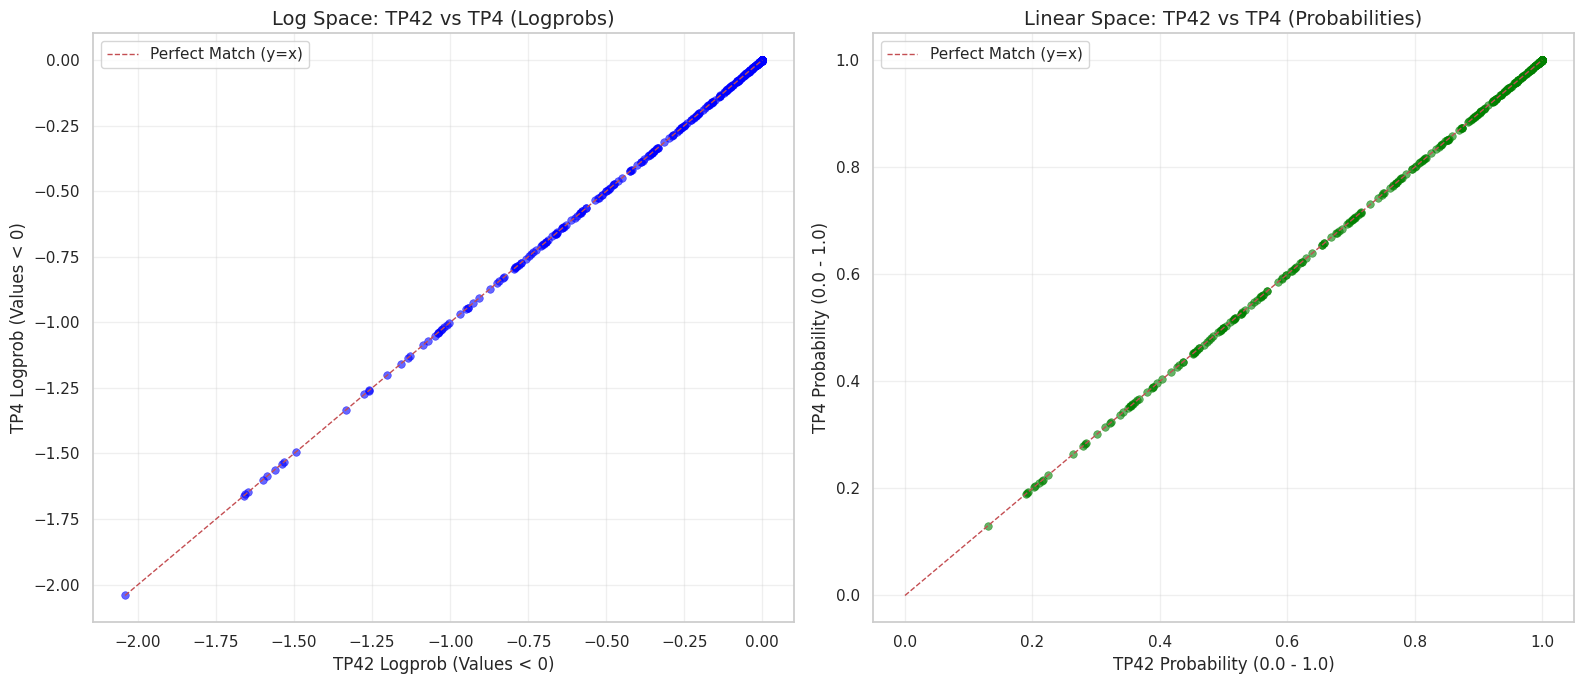

Logprob 相关系数: 1.00000000
Probability 相关系数: 1.00000000

====== 📉 误差统计分析 (Metrics) ======
MSE (Logprob空间):      0.00000e+00
MSE (Probability空间):  0.00000e+00
----------------------------------------
平均相对误差 (Probability): 0.000000%  (Max: 0.0000%)

====== ⚠️ 相对误差(Prob)最大的 Top 3 样本 ======
ID: 0 | Token: 。

 | TP42_Prob: 0.3141 | TP4_Prob: 0.3141 | Err: 0.00%
ID: 0 | Token: 法国 | TP42_Prob: 0.8976 | TP4_Prob: 0.8976 | Err: 0.00%
ID: 0 | Token: 的 | TP42_Prob: 0.9932 | TP4_Prob: 0.9932 | Err: 0.00%


/tmp/ipykernel_71583/4221724963.py:328: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log') # 对数坐标更易观察 1e-6 级别的误差
/tmp/ipykernel_71583/4221724963.py:335: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.tight_layout()


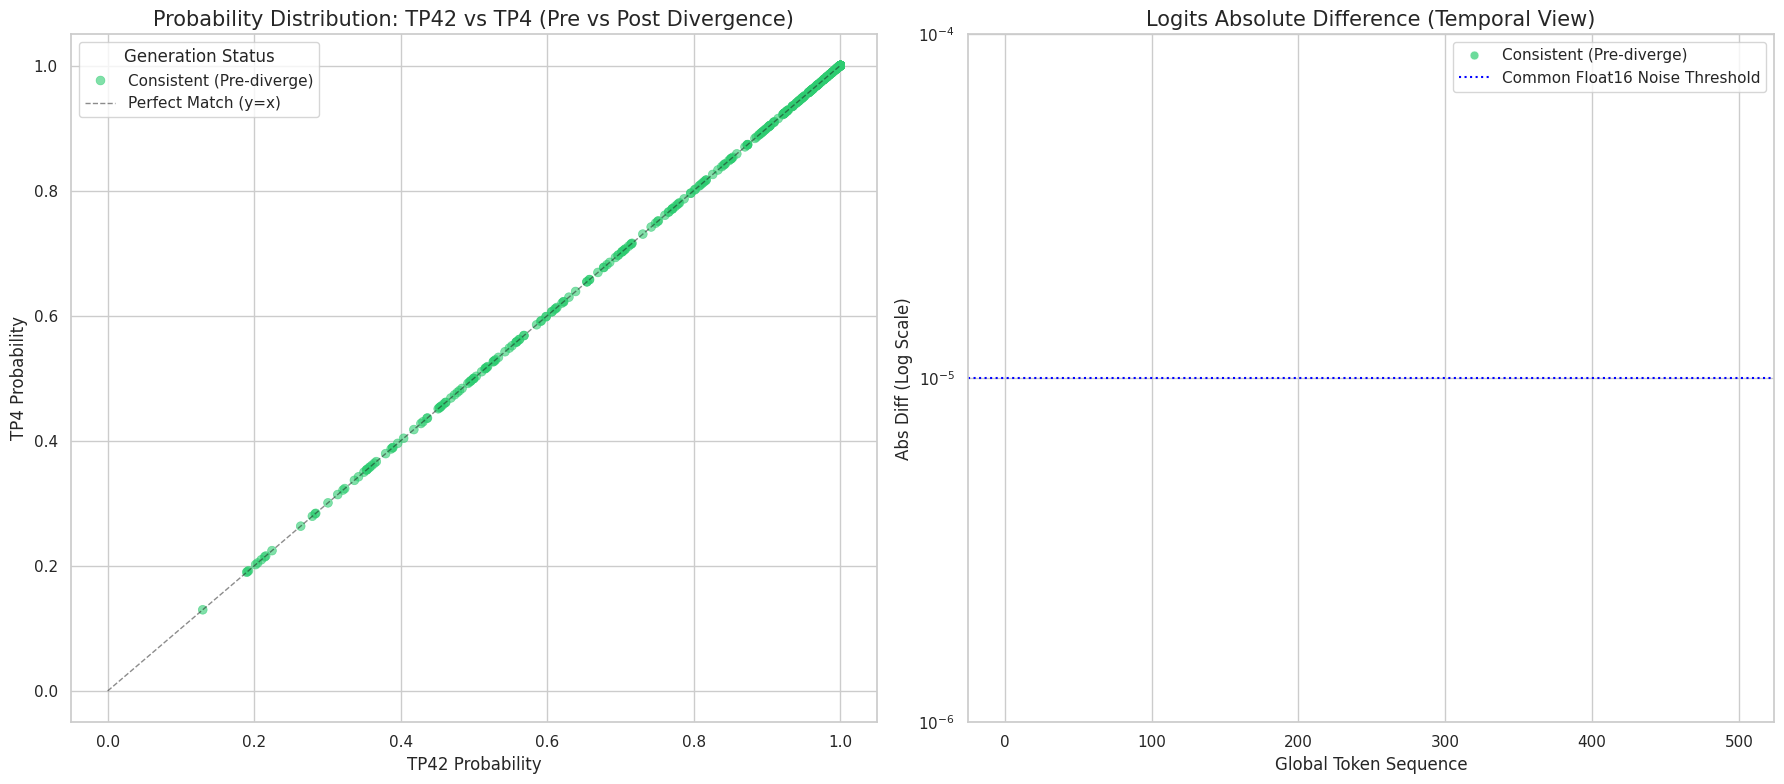

      ====== 📊 TP42 vs TP4 深度差异报告 ======      
总分析 Token 数: 500
发生路径偏离的 Token 数: 0 (占 0.00%)
--------------------------------------------------
【阶段 A: 路径一致时 (Consistent)】
 -> 平均 Logits 误差: 0.00e+00
 -> 最大 Logits 误差: 0.00e+00
 -> MSE (Probability): 0.00e+00

【阶段 B: 路径偏离后 (Diverged)】
 -> ✅ 恭喜：所有样本路径完全一致，未发生 Divergence。
--------------------------------------------------


In [32]:


# === 1. 加载数据 ===
# 请确保文件名和你刚才生成的一致
file_tp1 = 'result_detailed_tp4_run2.xlsx'
# file_tp1 = 'result_detailed_tp2_2.xlsx'
file_tp2 = 'result_detailed_tp4_run1.xlsx'

print(f"正在读取 {file_tp1} ...")
df_tp1 = pd.read_excel(file_tp1)
print(f"正在读取 {file_tp2} ...")
df_tp2 = pd.read_excel(file_tp2)

# 给列名加后缀，防止重名
# 我们主要对比 Top1 的数值，以及 Top1 的 Token ID 是否一致
suffix_tp1 = '_TP42'
suffix_tp2 = '_TP4'

# === 2. 数据对齐与合并 ===
# 我们按 Question_ID 和 Step_Index (第几个词) 进行对齐
merge_keys = ['Question_ID', 'Step_Index']
df_merged = pd.merge(
    df_tp1,
    df_tp2,
    on=merge_keys,
    suffixes=(suffix_tp1, suffix_tp2),
    how='inner'
)

analyze_and_visualize_logits(df_merged, 'TP42', 'TP4')
compare_logprob_and_prob(df_merged, tp1_name='TP42', tp2_name='TP4')
x = calculate_error_metrics(df_merged, tp1_name='TP42', tp2_name='TP4')
x = analyze_divergence_tracking(df_merged, tp1_name='TP42', tp2_name='TP4')

# Hidden states analysis

In [15]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
from typing import Dict, List, Optional

# ==========================================
# 函数 1: 提取 .json 文件为字典
# ==========================================
def load_debug_json(filepath: str) -> Dict[int, dict]:
    """
    读取 JSONL 格式的文件，并按 index 组织成字典。

    Args:
        filepath: JSON 文件路径 (例如 'layer_13_post_attn_tp1.json')
    Returns:
        Dict: { index: { 'shape': list, 'data': np.array } }
    """
    data_map = {}
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            if not line.strip():
                continue
            entry = json.loads(line)
            idx = entry['index']
            # 将列表转换为 numpy 数组以便后续计算，同时保持原始维度
            data_map[idx] = {
                'shape': entry['shape'],
                'data': np.array(entry['data'], dtype=np.float32)
            }
    print(f"[Loader] 成功加载 {filepath}, 包含 {len(data_map)} 个 Step 数据。")
    return data_map

# ==========================================
# 函数 2: 比较不同配置之间的相似度
# ==========================================
def compare_tp_configs(dict_ref: Dict[int, dict], dict_target: Dict[int, dict]) -> pd.DataFrame:
    """
    比较两个字典中相同 index 和 shape 的数据相似度。
    使用三种指标：Cosine Similarity, Pearson Correlation, MSE (均方误差)。

    Returns:
        pd.DataFrame: 包含 Index, Shape, 各项指标的 Mean/Max/Min
    """
    results = []

    # 获取交集索引并排序
    common_indices = sorted(set(dict_ref.keys()) & set(dict_target.keys()))

    for idx in common_indices:
        data1 = dict_ref[idx]['data']
        data2 = dict_target[idx]['data']
        shape1 = dict_ref[idx]['shape']
        shape2 = dict_target[idx]['shape']

        # 1. 检查 Shape 是否一致 (如果不一致，通常是 prefill/decode 阶段不对应，跳过)
        if shape1 != shape2:
            continue

        # 将数据展平为 [N, D] 形式，其中 D 是最后一个维度（Hidden Dim）
        # 如果是 [10, 2048]，则 N=10, D=2048
        v1 = data1.reshape(-1, data1.shape[-1])
        v2 = data2.reshape(-1, data2.shape[-1])

        cos_list, pearson_list, mse_list = [], [], []

        # 2. 逐向量计算 (以 2048 维度为例)
        for i in range(v1.shape[0]):
            vec1 = v1[i].reshape(1, -1)
            vec2 = v2[i].reshape(1, -1)

            # 指标 A: 余弦相似度
            cos = cosine_similarity(vec1, vec2)[0][0]
            cos_list.append(cos)

            # 指标 B: Pearson 相关系数
            # pearsonr 返回 (correlation, p-value)，由于是浮点对比，重点在 correlation
            corr, _ = pearsonr(v1[i], v2[i])
            pearson_list.append(corr)

            # 指标 C: MSE (均方误差) - 反应数值绝对偏差
            mse = np.mean((v1[i] - v2[i])**2)
            mse_list.append(mse)

        # 3. 汇总当前 Step 的指标
        results.append({
            'index': idx,
            'shape': str(shape1),
            'cos_mean': np.mean(cos_list),
            'cos_max': np.max(cos_list),
            'cos_min': np.min(cos_list),
            'pearson_mean': np.mean(pearson_list),
            'pearson_max': np.max(pearson_list),
            'pearson_min': np.min(pearson_list),
            'mse_mean': np.mean(mse_list),
            'mse_max': np.max(mse_list)
        })

    df = pd.DataFrame(results)
    return df

# ==========================================
# 函数 3: 绘制相似度变化曲线
# ==========================================
def plot_similarity_report(df: pd.DataFrame, metric_type: str = 'cos', title: str = "TP Consistency Analysis", plot_min_max: bool = True):
    """
    绘制指定指标随 Index 变化的趋势图。

    Args:
        df: compare_tp_configs 生成的 DataFrame
        metric_type: 'cos', 'pearson', 或 'mse'
    """
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(14, 7))

    # 映射列名
    prefix = metric_type.lower()
    col_mean = f"{prefix}_mean"
    col_max = f"{prefix}_max"
    col_min = f"{prefix}_min"

    if col_mean not in df.columns:
        print(f"错误: 找不到指标 {metric_type}")
        return

    # 绘制均值曲线
    plt.plot(df['index'], df[col_mean], color='#1f77b4', label=f'Mean {metric_type.upper()}', linewidth=2, marker='o', markersize=4)

    # 绘制最大/最小值填充区间 (Shaded Area)
    if col_min in df.columns and plot_min_max:
        plt.fill_between(df['index'], df[col_min], df[col_max], color='#1f77b4', alpha=0.2, label='Max-Min Range')

    # 添加拟合曲线 (Polynomial Fit)
    z = np.polyfit(df['index'], df[col_mean], 3)
    p = np.poly1d(z)
    plt.plot(df['index'], p(df['index']), "r--", alpha=0.8, label='Trend')

    # 美化图表
    plt.title(f'{title}: {metric_type.upper()} over Steps', fontsize=16)
    plt.xlabel('Token Generation Step (Index)', fontsize=12)
    plt.ylabel(f'Similarity Metric ({metric_type.upper()})', fontsize=12)

    # 如果是 Cosine 或 Pearson，固定 Y 轴范围在 [0, 1.05] 方便观察
    if metric_type in ['cos', 'pearson'] and plot_min_max:
        current_min = df[col_min].min()
        plt.ylim(max(0, current_min - 0.05), 1.05)

    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [3]:
import os
print("当前工作目录:", os.getcwd())

当前工作目录: /public/data_science/saultysoup/tp_test


In [ ]:
# 1. 加载两个不同 TP 配置的文件
# 假设我们要对比 Layer 0 的 Attention 在 TP1 和 TP2 下的差异
tp1_data = load_debug_json('./vllm_debug_dump/layer_00_post_attn_tp1.json')
tp2_data = load_debug_json('./vllm_debug_dump/layer_00_post_attn_tp2.json')

# 2. 生成对比报表
report_df = compare_tp_configs(tp1_data, tp2_data)

# 查看表格
# print(report_df[['index', 'shape', 'cos_mean', 'pearson_mean', 'mse_mean']].head())

# 3. 绘图分析
# 绘制余弦相似度
plot_similarity_report(report_df, metric_type='cos', title="Layer 0 Post-Attn TP1 vs TP2", plot_min_max= False)

# 绘制 Pearson 相关系数
# plot_similarity_report(report_df, metric_type='pearson', title="Layer 0 Post-Attn TP1 vs TP2")

# 绘制 MSE (注意：MSE 越小越好，绘图时不需要固定 [0,1] 范围)
# plot_similarity_report(report_df, metric_type='mse', title="Absolute Error (MSE) Trend")

[Loader] 成功加载 ./vllm_debug_dump/layer_00_post_attn_tp1.json, 包含 50 个 Step 数据。
[Loader] 成功加载 ./vllm_debug_dump/layer_00_post_attn_tp2.json, 包含 50 个 Step 数据。
[Loader] 成功加载 ./vllm_debug_dump/layer_00_post_attn_tp4.json, 包含 50 个 Step 数据。


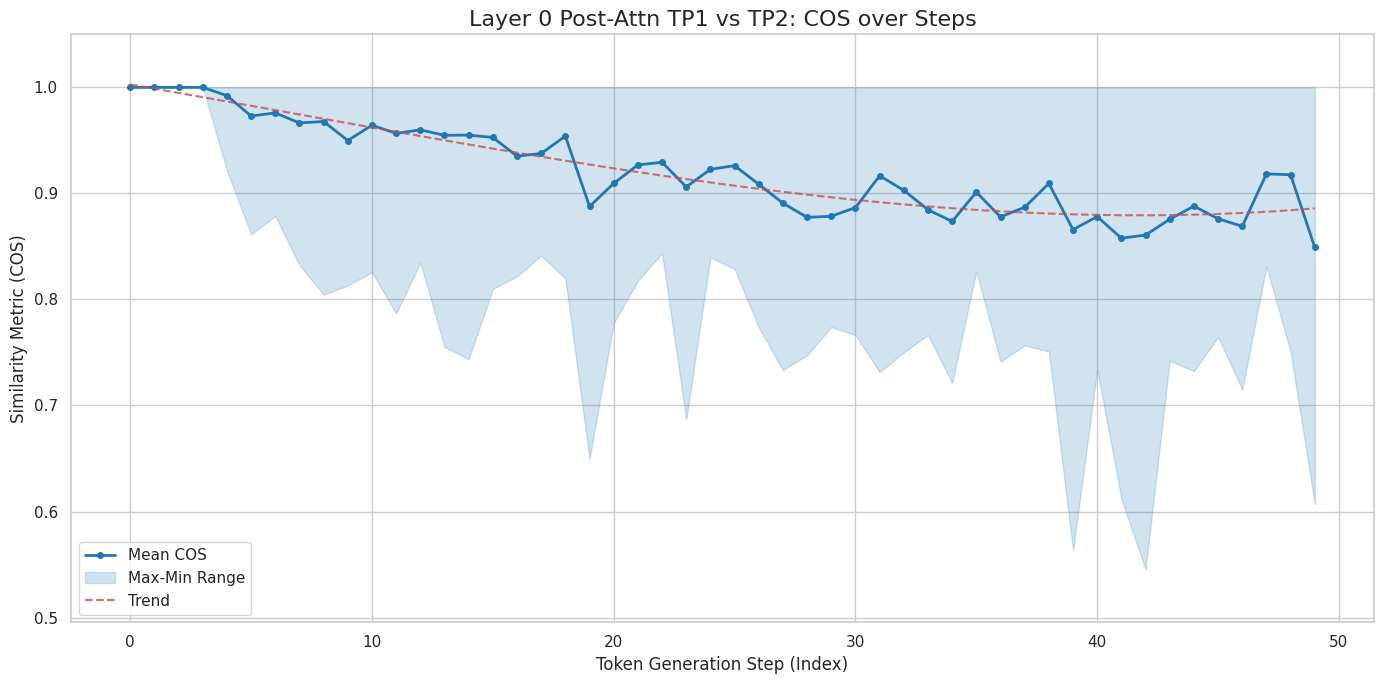

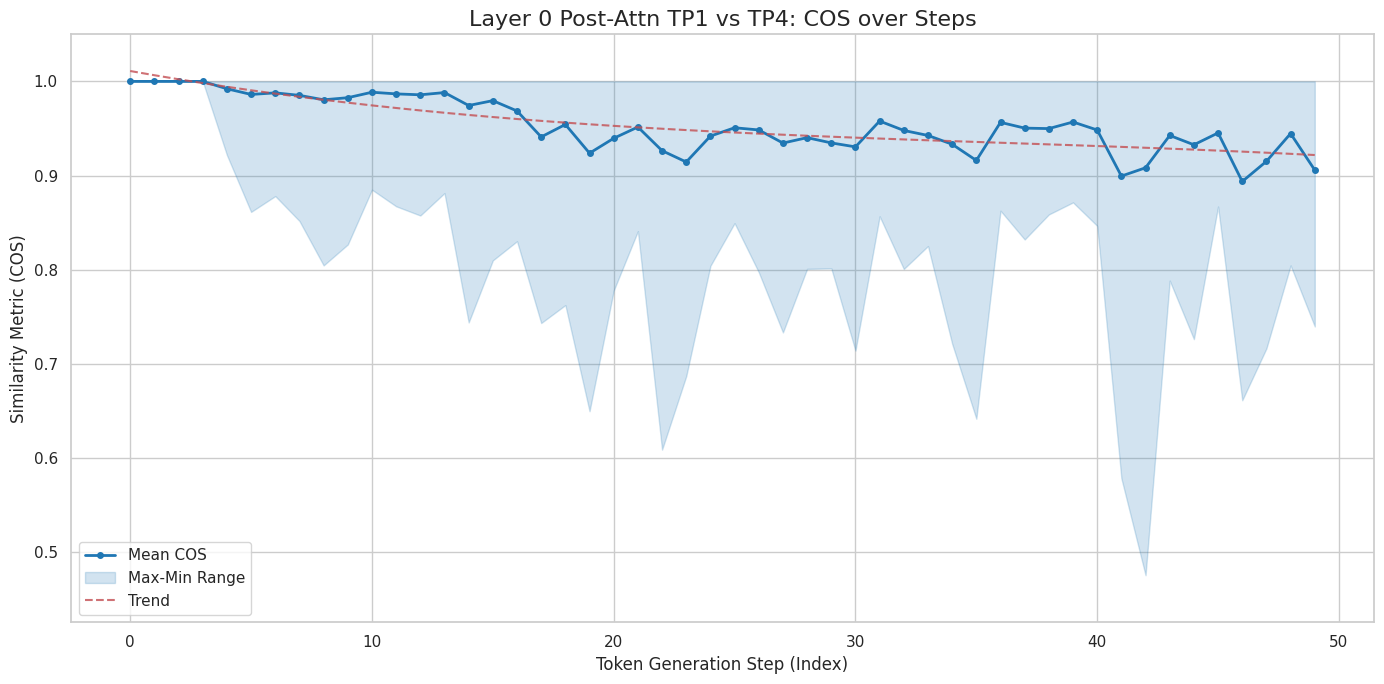

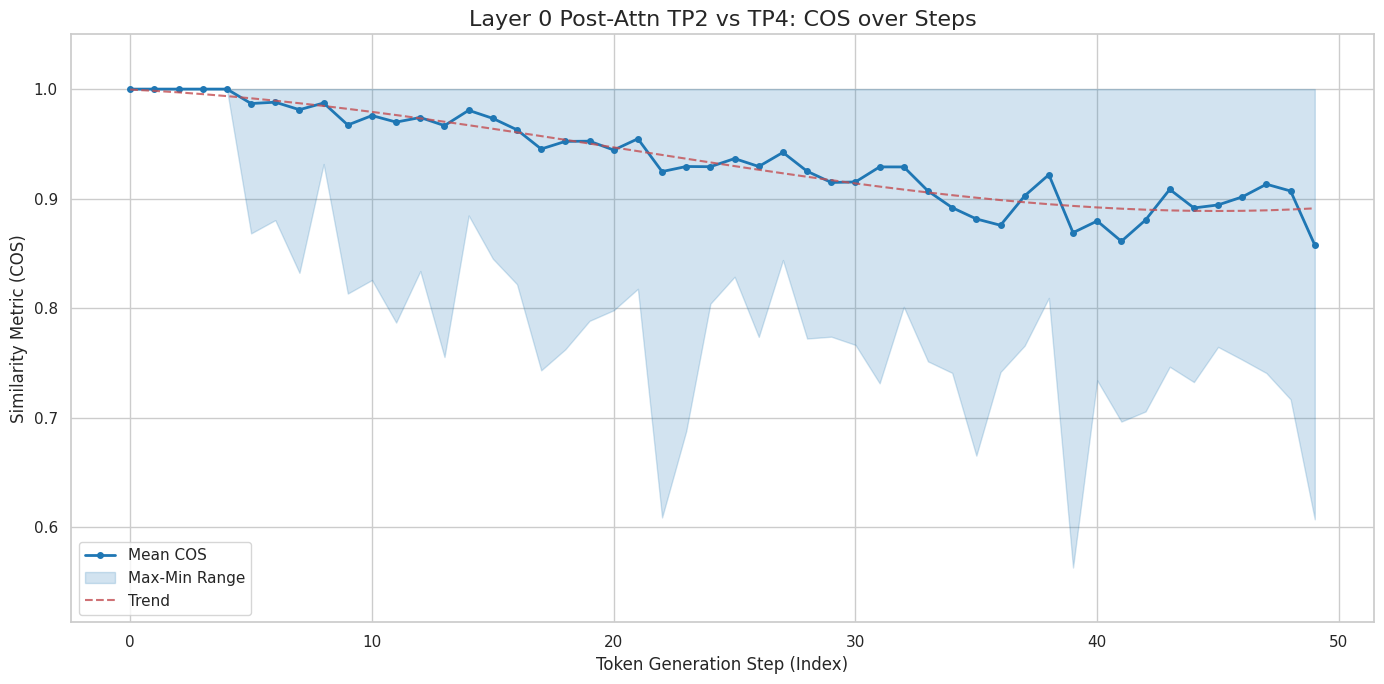

In [17]:
tp1_data = load_debug_json('./vllm_debug_dump/layer_00_post_attn_tp1.json')
tp2_data = load_debug_json('./vllm_debug_dump/layer_00_post_attn_tp2.json')
tp4_data = load_debug_json('./vllm_debug_dump/layer_00_post_attn_tp4.json')
report_df = compare_tp_configs(tp1_data, tp2_data)
plot_similarity_report(report_df, metric_type='cos', title="Layer 0 Post-Attn TP1 vs TP2", plot_min_max= True)


report_df = compare_tp_configs(tp1_data, tp4_data)
plot_similarity_report(report_df, metric_type='cos', title="Layer 0 Post-Attn TP1 vs TP4", plot_min_max= True)


report_df = compare_tp_configs(tp2_data, tp4_data)
plot_similarity_report(report_df, metric_type='cos', title="Layer 0 Post-Attn TP2 vs TP4", plot_min_max= True)


# #.#.#.#.#.#.#.#.#.#.#